# Real-time Implementation and Automation with Oanda 

--------------------------------------------------------------------------------------------------------------------

_Disclaimer: <br>
The following illustrative examples are for general information and educational purposes only. <br>
It is neither investment advice nor a recommendation to trade, invest or take whatsoever actions.<br>
The below code should only be used in combination with an Oanda Practice/Demo Account and NOT with a Live Trading Account._

------------------------------------------------------------------------------------

## Recap: Historical Data, real-time Data and Orders

In [11]:
import pandas as pd
import tpqoa
import warnings
warnings.filterwarnings('ignore')

In [12]:
api = tpqoa.tpqoa("oanda.cfg")

In [13]:
api.get_instruments()

[('AUD/CAD', 'AUD_CAD'),
 ('AUD/CHF', 'AUD_CHF'),
 ('AUD/HKD', 'AUD_HKD'),
 ('AUD/JPY', 'AUD_JPY'),
 ('AUD/NZD', 'AUD_NZD'),
 ('AUD/SGD', 'AUD_SGD'),
 ('AUD/USD', 'AUD_USD'),
 ('Australia 200', 'AU200_AUD'),
 ('Brent Crude Oil', 'BCO_USD'),
 ('Bund', 'DE10YB_EUR'),
 ('CAD/CHF', 'CAD_CHF'),
 ('CAD/HKD', 'CAD_HKD'),
 ('CAD/JPY', 'CAD_JPY'),
 ('CAD/SGD', 'CAD_SGD'),
 ('CHF/HKD', 'CHF_HKD'),
 ('CHF/JPY', 'CHF_JPY'),
 ('CHF/ZAR', 'CHF_ZAR'),
 ('China A50', 'CN50_USD'),
 ('China H Shares', 'CHINAH_HKD'),
 ('Copper', 'XCU_USD'),
 ('Corn', 'CORN_USD'),
 ('EUR/AUD', 'EUR_AUD'),
 ('EUR/CAD', 'EUR_CAD'),
 ('EUR/CHF', 'EUR_CHF'),
 ('EUR/CZK', 'EUR_CZK'),
 ('EUR/DKK', 'EUR_DKK'),
 ('EUR/GBP', 'EUR_GBP'),
 ('EUR/HKD', 'EUR_HKD'),
 ('EUR/HUF', 'EUR_HUF'),
 ('EUR/JPY', 'EUR_JPY'),
 ('EUR/NOK', 'EUR_NOK'),
 ('EUR/NZD', 'EUR_NZD'),
 ('EUR/PLN', 'EUR_PLN'),
 ('EUR/SEK', 'EUR_SEK'),
 ('EUR/SGD', 'EUR_SGD'),
 ('EUR/TRY', 'EUR_TRY'),
 ('EUR/USD', 'EUR_USD'),
 ('EUR/ZAR', 'EUR_ZAR'),
 ('Europe 50', 'EU50_EUR

__Historical Data__

In [14]:
api.get_history(instrument = "EUR_USD", start = "2024-09-24", end = "2024-09-26",
                granularity = "M1", price = "M", localize = False) # S5 drops a Future Warning which can be ignored for now

,o,h,l,c,volume,complete
time,,,,,,
2024-09-24 00:00:00+00:00,1.11109,1.11120,1.11106,1.11120,63,True
2024-09-24 00:01:00+00:00,1.11119,1.11122,1.11105,1.11105,47,True
2024-09-24 00:02:00+00:00,1.11106,1.11106,1.11090,1.11101,44,True
2024-09-24 00:03:00+00:00,1.11098,1.11099,1.11084,1.11086,72,True
2024-09-24 00:04:00+00:00,1.11086,1.11092,1.11084,1.11092,76,True
...,...,...,...,...,...,...
2024-09-25 23:55:00+00:00,1.11306,1.11308,1.11306,1.11308,17,True
2024-09-25 23:56:00+00:00,1.11308,1.11312,1.11306,1.11312,10,True
2024-09-25 23:57:00+00:00,1.11312,1.11313,1.11305,1.11306,11,True


__Streaming ticks / real-time Data__

In [15]:
api.stream_data("EUR_USD", stop = 20) 

2025-05-27T21:33:06.219615810Z 1.13268 1.13297
2025-05-27T21:34:54.849652002Z 1.13272 1.13297
2025-05-27T21:35:00.009297304Z 1.13273 1.13297


KeyboardInterrupt: 

__Orders & Trades__

In [16]:
api.create_order(instrument = "EUR_USD", units = 100000)



 {'id': '11', 'time': '2025-05-27T21:37:09.441749190Z', 'userID': 31574832, 'accountID': '101-004-31574832-001', 'batchID': '10', 'requestID': '79390838937380671', 'type': 'ORDER_FILL', 'orderID': '10', 'instrument': 'EUR_USD', 'units': '100000.0', 'gainQuoteHomeConversionFactor': '0.736581498642', 'lossQuoteHomeConversionFactor': '0.743984327775', 'price': 1.13297, 'fullVWAP': 1.13297, 'fullPrice': {'type': 'PRICE', 'bids': [{'price': 1.13275, 'liquidity': '500000'}, {'price': 1.13274, 'liquidity': '500000'}, {'price': 1.13273, 'liquidity': '2000000'}, {'price': 1.13272, 'liquidity': '2000000'}, {'price': 1.13271, 'liquidity': '5000000'}, {'price': 1.13269, 'liquidity': '10000000'}, {'price': 1.13266, 'liquidity': '10000000'}], 'asks': [{'price': 1.13297, 'liquidity': '500000'}, {'price': 1.13299, 'liquidity': '2500000'}, {'price': 1.133, 'liquidity': '2000000'}, {'price': 1.13301, 'liquidity': '5000000'}, {'price': 1.13304, 'liquidity': '10000000'}, {'price': 1.13307, 'liquidity': 

In [17]:
api.get_positions()

[{'instrument': 'EUR_USD',
  'pl': '-9.8345',
  'unrealizedPL': '-14.1354',
  'marginUsed': '2795.4',
  'resettablePL': '-9.8345',
  'financing': '0.0',
  'commission': '0.0',
  'guaranteedExecutionFees': '0.0',
  'long': {'units': '100000.0',
   'averagePrice': 1.13297,
   'tradeIDs': ['11'],
   'pl': '-9.8345',
   'unrealizedPL': '-14.1354',
   'resettablePL': '-9.8345',
   'financing': '0.0',
   'guaranteedExecutionFees': '0.0'},
  'short': {'units': '0.0',
   'pl': '0.0',
   'unrealizedPL': '0.0',
   'resettablePL': '0.0',
   'financing': '0.0',
   'guaranteedExecutionFees': '0.0'}}]

In [18]:
api.create_order(instrument = "EUR_USD", units = -100000)



 {'id': '13', 'time': '2025-05-27T21:37:17.593968445Z', 'userID': 31574832, 'accountID': '101-004-31574832-001', 'batchID': '12', 'requestID': '79390838970940770', 'type': 'ORDER_FILL', 'orderID': '12', 'instrument': 'EUR_USD', 'units': '-100000.0', 'gainQuoteHomeConversionFactor': '0.736540603585', 'lossQuoteHomeConversionFactor': '0.743943021712', 'price': 1.1328, 'fullVWAP': 1.1328, 'fullPrice': {'type': 'PRICE', 'bids': [{'price': 1.1328, 'liquidity': '500000'}, {'price': 1.13279, 'liquidity': '500000'}, {'price': 1.13278, 'liquidity': '2000000'}, {'price': 1.13277, 'liquidity': '2000000'}, {'price': 1.13276, 'liquidity': '5000000'}, {'price': 1.13274, 'liquidity': '10000000'}, {'price': 1.13271, 'liquidity': '10000000'}], 'asks': [{'price': 1.13305, 'liquidity': '500000'}, {'price': 1.13307, 'liquidity': '2500000'}, {'price': 1.13308, 'liquidity': '2000000'}, {'price': 1.13309, 'liquidity': '5000000'}, {'price': 1.13312, 'liquidity': '10000000'}, {'price': 1.13315, 'liquidity': 

In [19]:
api.get_account_summary()

{'id': '101-004-31574832-001',
 'alias': 'Primary',
 'currency': 'GBP',
 'balance': '99977.5185',
 'createdByUserID': 31574832,
 'createdTime': '2025-04-23T11:21:53.505019737Z',
 'guaranteedStopLossOrderMode': 'ALLOWED',
 'pl': '-22.4815',
 'resettablePL': '-22.4815',
 'resettablePLTime': '0',
 'financing': '0.0',
 'commission': '0.0',
 'guaranteedExecutionFees': '0.0',
 'marginRate': '0.03333333333333',
 'openTradeCount': 0,
 'openPositionCount': 0,
 'pendingOrderCount': 0,
 'hedgingEnabled': False,
 'unrealizedPL': '0.0',
 'NAV': '99977.5185',
 'marginUsed': '0.0',
 'marginAvailable': '99977.5185',
 'positionValue': '0.0',
 'marginCloseoutUnrealizedPL': '0.0',
 'marginCloseoutNAV': '99977.5185',
 'marginCloseoutMarginUsed': '0.0',
 'marginCloseoutPercent': '0.0',
 'marginCloseoutPositionValue': '0.0',
 'withdrawalLimit': '99977.5185',
 'marginCallMarginUsed': '0.0',
 'marginCallPercent': '0.0',
 'lastTransactionID': '13'}

In [20]:
api.get_transactions()

[{'id': '1',
  'time': '2025-04-23T11:21:53.505019737Z',
  'userID': 31574832,
  'accountID': '101-004-31574832-001',
  'batchID': '1',
  'requestID': '1700674228767794901',
  'type': 'CREATE',
  'divisionID': 4,
  'siteID': 101,
  'accountUserID': 31574832,
  'accountNumber': 1,
  'homeCurrency': 'GBP'},
 {'id': '2',
  'time': '2025-04-23T11:21:53.505019737Z',
  'userID': 31574832,
  'accountID': '101-004-31574832-001',
  'batchID': '1',
  'requestID': '1700674228767794901',
  'type': 'CLIENT_CONFIGURE',
  'alias': 'Primary',
  'marginRate': '0.03333333333333'},
 {'id': '3',
  'time': '2025-04-23T11:21:55.158889150Z',
  'userID': 31574832,
  'accountID': '101-004-31574832-001',
  'batchID': '3',
  'requestID': '1718688627285665578',
  'type': 'TRANSFER_FUNDS',
  'amount': '100000.0',
  'fundingReason': 'CLIENT_FUNDING',
  'accountBalance': '100000.0'},
 {'id': '4',
  'time': '2025-05-11T22:59:24.999039461Z',
  'userID': 31574832,
  'accountID': '101-004-31574832-001',
  'batchID': '4'

In [21]:
api.print_transactions()

   5 | 2025-05-11T22:59:24.99 | EUR_USD | 100000.0 |      0.0
   8 | 2025-05-11T23:01:27.95 | EUR_USD | -100000.0 |  -9.8345
  11 | 2025-05-27T21:37:09.44 | EUR_USD | 100000.0 |      0.0
  13 | 2025-05-27T21:37:17.59 | EUR_USD | -100000.0 |  -12.647


In [22]:
order = api.create_order(instrument = "EUR_USD", units = 100000, suppress = True, ret = True)

In [23]:
order

{'id': '15',
 'time': '2025-05-27T21:38:42.988262887Z',
 'userID': 31574832,
 'accountID': '101-004-31574832-001',
 'batchID': '14',
 'requestID': '79390839327515353',
 'type': 'ORDER_FILL',
 'orderID': '14',
 'instrument': 'EUR_USD',
 'units': '100000.0',
 'gainQuoteHomeConversionFactor': '0.736556969333',
 'lossQuoteHomeConversionFactor': '0.74395955194',
 'price': 1.13325,
 'fullVWAP': 1.13325,
 'fullPrice': {'type': 'PRICE',
  'bids': [{'price': 1.13278, 'liquidity': '500000'},
   {'price': 1.13277, 'liquidity': '500000'},
   {'price': 1.13276, 'liquidity': '2000000'},
   {'price': 1.13275, 'liquidity': '2000000'},
   {'price': 1.13274, 'liquidity': '5000000'},
   {'price': 1.13272, 'liquidity': '10000000'},
   {'price': 1.13269, 'liquidity': '10000000'}],
  'asks': [{'price': 1.13325, 'liquidity': '500000'},
   {'price': 1.13327, 'liquidity': '2500000'},
   {'price': 1.13328, 'liquidity': '2000000'},
   {'price': 1.13329, 'liquidity': '5000000'},
   {'price': 1.13332, 'liquidity':

In [24]:
order["price"]

1.13325

In [25]:
order2 = api.create_order(instrument = "EUR_USD", units = -100000, suppress = True, ret = True)

In [26]:
order2 

{'id': '17',
 'time': '2025-05-27T21:39:46.389397726Z',
 'userID': 31574832,
 'accountID': '101-004-31574832-001',
 'batchID': '16',
 'requestID': '79390839595995329',
 'type': 'ORDER_FILL',
 'orderID': '16',
 'instrument': 'EUR_USD',
 'units': '-100000.0',
 'gainQuoteHomeConversionFactor': '0.736559697099',
 'lossQuoteHomeConversionFactor': '0.74396230712',
 'price': 1.13286,
 'fullVWAP': 1.13286,
 'fullPrice': {'type': 'PRICE',
  'bids': [{'price': 1.13286, 'liquidity': '500000'},
   {'price': 1.13285, 'liquidity': '500000'},
   {'price': 1.13284, 'liquidity': '2000000'},
   {'price': 1.13283, 'liquidity': '2000000'},
   {'price': 1.13282, 'liquidity': '5000000'},
   {'price': 1.1328, 'liquidity': '10000000'},
   {'price': 1.13277, 'liquidity': '10000000'}],
  'asks': [{'price': 1.13318, 'liquidity': '500000'},
   {'price': 1.1332, 'liquidity': '2500000'},
   {'price': 1.13321, 'liquidity': '2000000'},
   {'price': 1.13322, 'liquidity': '5000000'},
   {'price': 1.13325, 'liquidity': 

In [27]:
order2["price"]

1.13286

In [28]:
float(order2["pl"])

-29.0145

In [29]:
order2["time"]

'2025-05-27T21:39:46.389397726Z'

In [30]:
order2["units"]

'-100000.0'

In [31]:
order2["id"]

'17'

## Preview: A Trader Class live in action

In [2]:
import pandas as pd
import numpy as np
import tpqoa
from datetime import datetime, timezone, timedelta
import time
import warnings
warnings.filterwarnings('ignore')

In [3]:
class ConTrader(tpqoa.tpqoa):
    def __init__(self, conf_file, instrument, bar_length, window, units):
        super().__init__(conf_file)
        self.instrument = instrument
        self.bar_length = pd.to_timedelta(bar_length)
        self.tick_data = pd.DataFrame()
        self.raw_data = None
        self.data = None 
        self.last_bar = None
        self.units = units
        self.position = 0
        self.profits = [] # NEW
        
        #*****************add strategy-specific attributes here******************
        self.window = window
        #************************************************************************
    
    def get_most_recent(self, days = 5):
        while True:
            time.sleep(2)
            now = datetime.now(timezone.utc).replace(tzinfo=None)
            now = now - timedelta(microseconds = now.microsecond)
            past = now - timedelta(days = days)
            df = self.get_history(instrument = self.instrument, start = past, end = now,
                                   granularity = "S5", price = "M", localize = False).c.dropna().to_frame()
            df.rename(columns = {"c":self.instrument}, inplace = True)
            df = df.resample(self.bar_length, label = "right").last().dropna().iloc[:-1]
            self.raw_data = df.copy()
            self.last_bar = self.raw_data.index[-1]
            if pd.to_datetime(datetime.now(timezone.utc)) - self.last_bar < self.bar_length:
                break
            
    def on_success(self, time, bid, ask):
        print(self.ticks, end = " ")
        
        # collect and store tick data
        recent_tick = pd.to_datetime(time)
        df = pd.DataFrame({self.instrument:(ask + bid)/2}, 
                          index = [recent_tick])
        self.tick_data = pd.concat([self.tick_data, df]) # new with pd.concat()
        
        # if a time longer than the bar_lenght has elapsed between last full bar and the most recent tick
        if recent_tick - self.last_bar >= self.bar_length:
            self.resample_and_join()
            self.define_strategy()
            self.execute_trades()
            
    def resample_and_join(self):
        self.raw_data = pd.concat([self.raw_data, self.tick_data.resample(self.bar_length, 
                                                                          label="right").last().ffill().iloc[:-1]]) 
        self.tick_data = self.tick_data.iloc[-1:]
        self.last_bar = self.raw_data.index[-1]
        
    def define_strategy(self): # "strategy-specific"
        df = self.raw_data.copy()
        
        #******************** define your strategy here ************************
        df["returns"] = np.log(df[self.instrument] / df[self.instrument].shift())
        df["position"] = -np.sign(df.returns.rolling(self.window).mean())
        #***********************************************************************
        
        self.data = df.copy()
        
    def execute_trades(self):
        if self.data["position"].iloc[-1] == 1:
            if self.position == 0:
                order = self.create_order(self.instrument, self.units, suppress = True, ret = True)
                self.report_trade(order, "GOING LONG")  # NEW
            elif self.position == -1:
                order = self.create_order(self.instrument, self.units * 2, suppress = True, ret = True) 
                self.report_trade(order, "GOING LONG")  # NEW
            self.position = 1
        elif self.data["position"].iloc[-1] == -1: 
            if self.position == 0:
                order = self.create_order(self.instrument, -self.units, suppress = True, ret = True)
                self.report_trade(order, "GOING SHORT")  # NEW
            elif self.position == 1:
                order = self.create_order(self.instrument, -self.units * 2, suppress = True, ret = True)
                self.report_trade(order, "GOING SHORT")  # NEW
            self.position = -1
        elif self.data["position"].iloc[-1] == 0: 
            if self.position == -1:
                order = self.create_order(self.instrument, self.units, suppress = True, ret = True) 
                self.report_trade(order, "GOING NEUTRAL")  # NEW
            elif self.position == 1:
                order = self.create_order(self.instrument, -self.units, suppress = True, ret = True)
                self.report_trade(order, "GOING NEUTRAL")  # NEW
            self.position = 0
    
    def report_trade(self, order, going):  # NEW
        time = order["time"]
        units = order["units"]
        price = order["price"]
        pl = float(order["pl"])
        self.profits.append(pl)
        cumpl = sum(self.profits)
        print("\n" + 100* "-")
        print("{} | {}".format(time, going))
        print("{} | units = {} | price = {} | P&L = {} | Cum P&L = {}".format(time, units, price, pl, cumpl))
        print(100 * "-" + "\n")  
  

Simple Contrarian: Bar_lenght = 1min | Window = 1 (1 minute)

In [4]:
trader = ConTrader("oanda.cfg", "EUR_USD", bar_length = "1min", window = 1, units = 100000)

In [5]:
trader.get_most_recent()
trader.stream_data(trader.instrument, stop = 200)
if trader.position != 0: # if we have a final open position
    close_order = trader.create_order(trader.instrument, units = -trader.position * trader.units, 
                                      suppress = True, ret = True) 
    trader.report_trade(close_order, "GOING NEUTRAL")
    trader.position = 0

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 
----------------------------------------------------------------------------------------------------
2025-05-28T12:43:03.367085455Z | GOING SHORT
2025-05-28T12:43:03.367085455Z | units = -100000.0 | price = 1.13113 | P&L = 0.0 | Cum P&L = 0.0
----------------------------------------------------------------------------------------------------

43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 
----------------------------------------------------------------------------------------------------
2025-05-28T12:44:01.187286184Z | GOING LONG
2025-05-28T12:44:01.187286184Z | units = 200000.0 | price = 1.13117 | P&L = -2.9845 | Cum P&

Simple Contrarian: Bar_lenght = 1min | Window = 60 (1 hour)

In [ ]:
trader = ConTrader("oanda.cfg", "EUR_USD", bar_length = "1min", window = 60, units = 100000)

In [ ]:
trader.get_most_recent()
trader.stream_data(trader.instrument, stop = 200)
if trader.position != 0: # if we have a final open position
    close_order = trader.create_order(trader.instrument, units = -trader.position * trader.units, 
                                      suppress = True, ret = True) 
    trader.report_trade(close_order, "GOING NEUTRAL")
    trader.position = 0

## Collecting and storing real-time tick data

In [6]:
import pandas as pd
import tpqoa

In [7]:
api = tpqoa.tpqoa("oanda.cfg")

In [8]:
api.stream_data("EUR_USD", stop = 10)

2025-05-28T12:47:53.686517331Z 1.13146 1.13154
2025-05-28T12:47:57.363094259Z 1.13144 1.1315
2025-05-28T12:47:58.291078836Z 1.13141 1.13147
2025-05-28T12:47:58.452959538Z 1.13138 1.13144
2025-05-28T12:47:58.655916126Z 1.13139 1.13145
2025-05-28T12:48:00.222980281Z 1.13139 1.13145
2025-05-28T12:48:00.685440198Z 1.13139 1.13145
2025-05-28T12:48:01.111471376Z 1.13139 1.13145
2025-05-28T12:48:01.352011527Z 1.13138 1.13144
2025-05-28T12:48:01.593128359Z 1.13137 1.13143


In [10]:
# two steps: 1) Retrieve tick data 2) call on_sucess() method to print tick data
api.stream_data??

Signature: api.stream_data(instrument, stop=None, ret=False, callback=None)
Source:   
    def stream_data(self, instrument, stop=None, ret=False, callback=None):
        ''' Starts a real-time data stream.

        Parameters
        instrument: string
            valid instrument name
        '''
        self.stream_instrument = instrument
        self.ticks = 0
        response = self.ctx_stream.pricing.stream(
            self.account_id, snapshot=True,
            instruments=instrument)
        msgs = []
        for msg_type, msg in response.parts():
            msgs.append(msg)
            # print(msg_type, msg)
            if msg_type == 'pricing.ClientPrice':
                self.ticks += 1
                self.time = msg.time
                if callback is not None:
                    callback(msg.instrument, msg.time,
                             float(msg.bids[0].dict()['price']),
                             float(msg.asks[0].dict()['price']))
                else:
      

In [11]:
# called by stream_data() when new data is retrieved 
api.on_success??

Signature: api.on_success(time, bid, ask)
Source:   
    def on_success(self, time, bid, ask):
        ''' Method called when new data is retrieved. '''
        print(time, bid, ask)
File:      c:\users\fuji\appdata\local\packages\pythonsoftwarefoundation.python.3.10_qbz5n2kfra8p0\localcache\local-packages\python310\site-packages\tpqoa\tpqoa.py
Type:      method

In [9]:
class CloneClass(tpqoa.tpqoa):
    
    def on_success(self, time, bid, ask):
        print("Time: {} | Bid: {} | Ask:{}".format(time, bid, ask))

In [12]:
api = CloneClass("oanda.cfg")

In [13]:
api.get_instruments()[:5]

[('AUD/CAD', 'AUD_CAD'),
 ('AUD/CHF', 'AUD_CHF'),
 ('AUD/HKD', 'AUD_HKD'),
 ('AUD/JPY', 'AUD_JPY'),
 ('AUD/NZD', 'AUD_NZD')]

In [14]:
api.stream_data("EUR_USD", stop = 5)

Time: 2025-05-28T13:11:01.394371575Z | Bid: 1.13012 | Ask:1.1302
Time: 2025-05-28T13:11:02.732833086Z | Bid: 1.13009 | Ask:1.13017
Time: 2025-05-28T13:11:02.877610176Z | Bid: 1.13007 | Ask:1.13015
Time: 2025-05-28T13:11:05.039782740Z | Bid: 1.13011 | Ask:1.1302
Time: 2025-05-28T13:11:06.860201361Z | Bid: 1.13012 | Ask:1.1302


## Storing and resampling real-time tick data (Part 1)

In [15]:
import pandas as pd
import tpqoa

In [16]:
class GetTickData(tpqoa.tpqoa):
    
    def __init__(self, config_file):
        super().__init__(config_file)
        self.tick_data = pd.DataFrame()
    
    def on_success(self, time, bid, ask):
        print(time, bid, ask)
        df = pd.DataFrame({"bid":bid, "ask":ask, "mid":(ask + bid)/2}, 
                          index = [pd.to_datetime(time)])
        #self.tick_data = self.tick_data.append(df) old -> append() deprecated
        self.tick_data = pd.concat([self.tick_data, df]) # new with pd.concat()

In [17]:
td = GetTickData("oanda.cfg")

In [18]:
td.stream_data("EUR_USD", stop = 10)

2025-05-28T13:14:12.634302979Z 1.13042 1.13049
2025-05-28T13:14:12.712771836Z 1.13039 1.13048
2025-05-28T13:14:12.929660138Z 1.13039 1.13047
2025-05-28T13:14:14.663167826Z 1.13035 1.13042
2025-05-28T13:14:14.939321729Z 1.13035 1.13043
2025-05-28T13:14:15.063803541Z 1.13035 1.13042
2025-05-28T13:14:16.940906909Z 1.13035 1.13043
2025-05-28T13:14:17.502654859Z 1.13034 1.13042
2025-05-28T13:14:18.871916596Z 1.13034 1.13043
2025-05-28T13:14:19.102480176Z 1.13035 1.13042


In [19]:
td.tick_data

,bid,ask,mid
2025-05-28 13:14:12.634302979+00:00,1.13042,1.13049,1.130455
2025-05-28 13:14:12.712771836+00:00,1.13039,1.13048,1.130435
2025-05-28 13:14:12.929660138+00:00,1.13039,1.13047,1.130430
2025-05-28 13:14:14.663167826+00:00,1.13035,1.13042,1.130385
2025-05-28 13:14:14.939321729+00:00,1.13035,1.13043,1.130390
2025-05-28 13:14:15.063803541+00:00,1.13035,1.13042,1.130385
2025-05-28 13:14:16.940906909+00:00,1.13035,1.13043,1.130390
2025-05-28 13:14:17.502654859+00:00,1.13034,1.13042,1.130380
2025-05-28 13:14:18.871916596+00:00,1.13034,1.13043,1.130385
2025-05-28 13:14:19.102480176+00:00,1.13035,1.13042,1.130385


In [20]:
td.tick_data.resample("1s", label = "right").last().ffill() # resample to 1s bars

,bid,ask,mid
2025-05-28 13:14:13+00:00,1.13039,1.13047,1.130430
2025-05-28 13:14:14+00:00,1.13039,1.13047,1.130430
2025-05-28 13:14:15+00:00,1.13035,1.13043,1.130390
2025-05-28 13:14:16+00:00,1.13035,1.13042,1.130385
2025-05-28 13:14:17+00:00,1.13035,1.13043,1.130390
2025-05-28 13:14:18+00:00,1.13034,1.13042,1.130380
2025-05-28 13:14:19+00:00,1.13034,1.13043,1.130385
2025-05-28 13:14:20+00:00,1.13035,1.13042,1.130385


In [21]:
td = GetTickData("oanda.cfg")

In [22]:
td.stream_data("EUR_USD", stop = 100)

2025-05-28T13:31:58.191820627Z 1.12988 1.12995
2025-05-28T13:32:00.426402819Z 1.12987 1.12995
2025-05-28T13:32:00.708618175Z 1.12991 1.12999
2025-05-28T13:32:01.505760795Z 1.12987 1.12994
2025-05-28T13:32:01.764797098Z 1.12995 1.13001
2025-05-28T13:32:01.879229335Z 1.12997 1.13004
2025-05-28T13:32:02.528889286Z 1.12997 1.13006
2025-05-28T13:32:02.902327358Z 1.12998 1.13006
2025-05-28T13:32:03.102618354Z 1.12998 1.13006
2025-05-28T13:32:08.309800112Z 1.13 1.13009
2025-05-28T13:32:08.539599069Z 1.13003 1.13012
2025-05-28T13:32:09.812885025Z 1.1301 1.13018
2025-05-28T13:32:10.076306759Z 1.13016 1.13025
2025-05-28T13:32:10.341584043Z 1.13017 1.13026
2025-05-28T13:32:10.545894470Z 1.13016 1.13025
2025-05-28T13:32:10.868875749Z 1.13017 1.13026
2025-05-28T13:32:10.885230261Z 1.13017 1.13025
2025-05-28T13:32:11.298360884Z 1.13017 1.13026
2025-05-28T13:32:11.462024465Z 1.13018 1.13026
2025-05-28T13:32:11.888582914Z 1.13018 1.13025
2025-05-28T13:32:12.018607775Z 1.13018 1.13026
2025-05-28T13:32:

In [ ]:
td.tick_data.resample("10s", label = "right").last()#.ffill()

## Storing and resampling real-time tick data (Part 2)

In [23]:
import pandas as pd
import tpqoa

In [24]:
class GetTickData(tpqoa.tpqoa):
    
    def __init__(self, config_file, bar_length):
        super().__init__(config_file)
        self.bar_length = bar_length
        self.tick_data = pd.DataFrame()
    
    def on_success(self, time, bid, ask):
        print(time, bid, ask)
        df = pd.DataFrame({"bid":bid, "ask":ask, "mid":(ask + bid)/2}, 
                          index = [pd.to_datetime(time)])
        self.tick_data = pd.concat([self.tick_data, df]) # new with pd.concat()
        self.data = self.tick_data.resample(self.bar_length, label = "right").last().ffill().iloc[:-1]

In [25]:
td = GetTickData("oanda.cfg", "5s")

In [26]:
td.stream_data("EUR_USD", stop = 20)

2025-05-28T14:25:26.446625718Z 1.13208 1.13215
2025-05-28T14:25:29.407122355Z 1.1321 1.13217
2025-05-28T14:25:30.533145275Z 1.13213 1.13221
2025-05-28T14:25:30.755955314Z 1.13213 1.13221
2025-05-28T14:25:31.416457723Z 1.13213 1.1322
2025-05-28T14:25:32.476716967Z 1.13211 1.13218
2025-05-28T14:25:32.739937169Z 1.13211 1.13219
2025-05-28T14:25:33.190087191Z 1.1321 1.13218
2025-05-28T14:25:33.311868234Z 1.13212 1.13219
2025-05-28T14:25:33.930228901Z 1.13213 1.13221
2025-05-28T14:25:34.680622148Z 1.13213 1.13219
2025-05-28T14:25:35.067895587Z 1.13211 1.1322
2025-05-28T14:25:35.386812613Z 1.13212 1.1322
2025-05-28T14:25:37.101364603Z 1.13213 1.13221
2025-05-28T14:25:38.853009210Z 1.13208 1.13216
2025-05-28T14:25:38.976193174Z 1.13209 1.13216
2025-05-28T14:25:39.637963054Z 1.13212 1.13219
2025-05-28T14:25:40.678900027Z 1.13213 1.13219
2025-05-28T14:25:40.939590210Z 1.13211 1.13219
2025-05-28T14:25:41.113422462Z 1.1321 1.13218


In [28]:
td.data

,bid,ask,mid
2025-05-28 14:25:30+00:00,1.13210,1.13217,1.132135
2025-05-28 14:25:35+00:00,1.13213,1.13219,1.132160
2025-05-28 14:25:40+00:00,1.13212,1.13219,1.132155


In [ ]:
td.tick_data

## Storing and resampling real-time tick data (Part 3)

In [29]:
import pandas as pd
import tpqoa

In [30]:
class ConTrader(tpqoa.tpqoa): # Ultimate Goal: Implementing a simple Contrarian Strategy
    
    def __init__(self, config_file, instrument, bar_length):
        super().__init__(config_file)
        self.instrument = instrument # define instrument
        self.bar_length = bar_length
        self.tick_data = pd.DataFrame()
    
    def on_success(self, time, bid, ask):
        print(self.ticks, end = " ") # Print running Tick number
        
        # collect and store tick data
        df = pd.DataFrame({self.instrument:(ask + bid)/2}, 
                          index = [pd.to_datetime(time)]) # mid price only
        self.tick_data = pd.concat([self.tick_data, df]) # new with pd.concat()
        
        self.resample_and_join() # NEW
        
    def resample_and_join(self): # NEW
        self.data = self.tick_data.resample(self.bar_length, label = "right").last().ffill().iloc[:-1]

In [31]:
for i in range(10):
    print(i, end = " ")

0 1 2 3 4 5 6 7 8 9 

In [32]:
trader = ConTrader("oanda.cfg", "EUR_USD", "5s")

In [33]:
trader.stream_data("EUR_USD", stop = 20)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

In [34]:
trader.data

,EUR_USD
2025-05-28 15:27:45+00:00,1.129435
2025-05-28 15:27:50+00:00,1.129425
2025-05-28 15:27:55+00:00,1.129420
2025-05-28 15:28:00+00:00,1.129445


In [35]:
trader.tick_data

,EUR_USD
2025-05-28 15:27:42.282536721+00:00,1.129435
2025-05-28 15:27:46.741128427+00:00,1.129420
2025-05-28 15:27:46.908789486+00:00,1.129420
2025-05-28 15:27:47.268776177+00:00,1.129425
2025-05-28 15:27:47.458883849+00:00,1.129425
2025-05-28 15:27:50.456377645+00:00,1.129420
2025-05-28 15:27:51.954982990+00:00,1.129415
2025-05-28 15:27:52.527715555+00:00,1.129420
2025-05-28 15:27:52.591824144+00:00,1.129425
2025-05-28 15:27:54.196569734+00:00,1.129420


## Storing and resampling real-time tick data (Part 4)

__When should we resample?__ -> Only when a __full new bar__ is available!<br>
-> Whenever there are more than 5s (bar_length) between the __most recent tick__ and __last full bar__. 

In [36]:
import pandas as pd
import tpqoa
from datetime import datetime, timezone  # timezone added (Python 3.12)

In [37]:
class ConTrader(tpqoa.tpqoa):
    
    def __init__(self, config_file, instrument, bar_length):
        super().__init__(config_file)
        self.instrument = instrument
        self.bar_length = pd.to_timedelta(bar_length) # Pandas Timedelta Object
        self.tick_data = pd.DataFrame()
        self.last_bar = pd.to_datetime(datetime.now(timezone.utc)) # UTC time at instantiation (NEW Python 3.12)
    
    def on_success(self, time, bid, ask):
        print(self.ticks, end = " ")
        
        # collect and store tick data
        recent_tick = pd.to_datetime(time) # Pandas Timestamp Object
        df = pd.DataFrame({self.instrument:(ask + bid)/2}, 
                          index = [recent_tick])
        self.tick_data = pd.concat([self.tick_data, df]) # new with pd.concat()
        
        # if a time longer than the bar_lenght has elapsed between last full bar and the most recent tick
        if recent_tick - self.last_bar > self.bar_length:
            self.resample_and_join()
    
    def resample_and_join(self):
        self.data = self.tick_data.resample(self.bar_length, label = "right").last().ffill().iloc[:-1]
        self.last_bar = self.data.index[-1]  # update time of last full bar
    

In [ ]:
datetime.utcnow() # old

In [ ]:
# pd.to_datetime(datetime.utcnow()).tz_localize("UTC") # old

In [38]:
datetime.now(timezone.utc) # new Python 3.12

datetime.datetime(2025, 5, 28, 15, 59, 29, 19702, tzinfo=datetime.timezone.utc)

In [39]:
pd.to_datetime(datetime.now(timezone.utc)) # new

Timestamp('2025-05-28 15:59:31.052291+0000', tz='UTC')

In [40]:
pd.to_timedelta("5s")

Timedelta('0 days 00:00:05')

In [41]:
trader = ConTrader("oanda.cfg", "EUR_USD", "5s")
trader.stream_data(trader.instrument, stop = 20)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

In [42]:
trader.data

,EUR_USD
2025-05-28 16:13:35+00:00,1.129375
2025-05-28 16:13:40+00:00,1.129375
2025-05-28 16:13:45+00:00,1.129400
2025-05-28 16:13:50+00:00,1.129375
2025-05-28 16:13:55+00:00,1.129340


In [43]:
trader.tick_data

,EUR_USD
2025-05-28 16:13:31.915423773+00:00,1.129375
2025-05-28 16:13:38.072024089+00:00,1.129390
2025-05-28 16:13:38.260046904+00:00,1.129380
2025-05-28 16:13:38.847321733+00:00,1.129380
2025-05-28 16:13:39.445072423+00:00,1.129375
2025-05-28 16:13:41.160182397+00:00,1.129365
2025-05-28 16:13:43.683572375+00:00,1.129365
2025-05-28 16:13:44.511954034+00:00,1.129395
2025-05-28 16:13:44.925936069+00:00,1.129400
2025-05-28 16:13:45.425992978+00:00,1.129375


## Storing and resampling real-time tick data (Part 5)

In [44]:
import pandas as pd
import tpqoa
from datetime import datetime, timezone  # timezone added (Python 3.12)

Goal: Once we have added a new full bar...<br>
- delete the correpsonding ticks from self.tick_data
- only keep the latest tick (next bar)

(Recap: receiving the first tick of the next bar is the signal to resample)

In [45]:
class ConTrader(tpqoa.tpqoa):
    
    def __init__(self, config_file, instrument, bar_length):
        super().__init__(config_file)
        self.instrument = instrument 
        self.bar_length = pd.to_timedelta(bar_length)
        self.tick_data = pd.DataFrame()
        self.data = pd.DataFrame() # NEW
        self.last_bar = pd.to_datetime(datetime.now(timezone.utc)) # UTC time at instantiation (NEW Python 3.12)
    
    def on_success(self, time, bid, ask):
        print(self.ticks, end = " ") 
        
        # collect and store tick data
        recent_tick = pd.to_datetime(time)
        df = pd.DataFrame({self.instrument:(ask + bid)/2}, 
                          index = [recent_tick]) 
        self.tick_data = pd.concat([self.tick_data, df]) # new with pd.concat()
        
        # if a time longer than the bar_lenght has elapsed between last full bar and the most recent tick
        if recent_tick - self.last_bar > self.bar_length:
            self.resample_and_join()
    
    def resample_and_join(self):
        #self.data = self.tick_data.resample(self.bar_length, label = "right").last().ffill().iloc[:-1]
        # NEW: append the most recent ticks (resampled) to self.data with concat
        self.data = pd.concat([self.data, self.tick_data.resample(self.bar_length, 
                                                                  label="right").last().ffill().iloc[:-1]])
        
        self.tick_data = self.tick_data.iloc[-1:] # NEW: only keep the latest tick (next bar)
        self.last_bar = self.data.index[-1] 

In [47]:
trader = ConTrader("oanda.cfg", "EUR_USD", "5s")
trader.stream_data(trader.instrument, stop = 20)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

In [48]:
trader.data

,EUR_USD
2025-05-29 00:34:40+00:00,1.124740
2025-05-29 00:34:45+00:00,1.124730
2025-05-29 00:34:50+00:00,1.124725


In [49]:
trader.tick_data # only most recent ticks since last full bar

,EUR_USD
2025-05-29 00:34:51.498445385+00:00,1.124725
2025-05-29 00:34:51.800062177+00:00,1.124700
2025-05-29 00:34:52.198383168+00:00,1.124695
2025-05-29 00:34:52.330128931+00:00,1.124690


## Working with historical data and real-time tick data (Part 1)

In [50]:
import pandas as pd
import tpqoa
from datetime import datetime, timezone, timedelta 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
now = datetime.utcnow() # old
now

In [51]:
now = datetime.now(timezone.utc).replace(tzinfo=None) # new (Python 3.12)
now

datetime.datetime(2025, 5, 29, 0, 40, 40, 1370)

In [52]:
now = now - timedelta(microseconds = now.microsecond)
now

datetime.datetime(2025, 5, 29, 0, 40, 40)

In [53]:
yesterday = now - timedelta(days = 1)
yesterday

datetime.datetime(2025, 5, 28, 0, 40, 40)

In [54]:
api = tpqoa.tpqoa("oanda.cfg")

In [55]:
instrument = "EUR_USD"

In [56]:
df = api.get_history(instrument = instrument, start = yesterday, end = now,
                     granularity = "S5", price = "M", localize = False)
df

,o,h,l,c,volume,complete
time,,,,,,
2025-05-28 00:40:40+00:00,1.13431,1.13432,1.13431,1.13432,4,True
2025-05-28 00:40:50+00:00,1.13431,1.13432,1.13430,1.13430,3,True
2025-05-28 00:40:55+00:00,1.13428,1.13428,1.13424,1.13426,8,True
2025-05-28 00:41:00+00:00,1.13428,1.13431,1.13428,1.13430,8,True
2025-05-28 00:41:40+00:00,1.13427,1.13430,1.13427,1.13430,5,True
...,...,...,...,...,...,...
2025-05-29 00:40:15+00:00,1.12458,1.12462,1.12458,1.12462,13,True
2025-05-29 00:40:20+00:00,1.12460,1.12461,1.12460,1.12460,4,True
2025-05-29 00:40:25+00:00,1.12460,1.12460,1.12458,1.12458,14,True


In [57]:
df = df.c.dropna().to_frame()
df

,c
time,
2025-05-28 00:40:40+00:00,1.13432
2025-05-28 00:40:50+00:00,1.13430
2025-05-28 00:40:55+00:00,1.13426
2025-05-28 00:41:00+00:00,1.13430
2025-05-28 00:41:40+00:00,1.13430
...,...
2025-05-29 00:40:15+00:00,1.12462
2025-05-29 00:40:20+00:00,1.12460
2025-05-29 00:40:25+00:00,1.12458


In [58]:
df.rename(columns = {"c":instrument}, inplace = True)
df

,EUR_USD
time,
2025-05-28 00:40:40+00:00,1.13432
2025-05-28 00:40:50+00:00,1.13430
2025-05-28 00:40:55+00:00,1.13426
2025-05-28 00:41:00+00:00,1.13430
2025-05-28 00:41:40+00:00,1.13430
...,...
2025-05-29 00:40:15+00:00,1.12462
2025-05-29 00:40:20+00:00,1.12460
2025-05-29 00:40:25+00:00,1.12458


In [59]:
df = df.resample("1min", label = "right").last().dropna().iloc[:-1]
df

,EUR_USD
time,
2025-05-28 00:41:00+00:00,1.13426
2025-05-28 00:42:00+00:00,1.13430
2025-05-28 00:43:00+00:00,1.13434
2025-05-28 00:44:00+00:00,1.13447
2025-05-28 00:45:00+00:00,1.13450
...,...
2025-05-29 00:36:00+00:00,1.12422
2025-05-29 00:37:00+00:00,1.12428
2025-05-29 00:38:00+00:00,1.12444


In [60]:
last_bar = df.index[-1]
last_bar

Timestamp('2025-05-29 00:40:00+0000', tz='UTC')

__Troubleshooting__

Don´t pass localized datetime objects to api.get_history()!

In [ ]:
now = datetime.now(timezone.utc).replace(tzinfo=None) # new (Python 3.12)
now

In [ ]:
now = now - timedelta(microseconds = now.microsecond)
now

In [ ]:
yesterday = now - timedelta(days = 1)
yesterday

In [ ]:
df = api.get_history(instrument = instrument, start = yesterday, end = now,
                     granularity = "S5", price = "M", localize = False)
df

## Working with historical data and real-time tick data (Part 2)

In [61]:
import pandas as pd
import tpqoa
from datetime import datetime, timezone, timedelta 
import warnings
warnings.filterwarnings('ignore')

In [62]:
class ConTrader(tpqoa.tpqoa):
    def __init__(self, conf_file, instrument, bar_length):
        super().__init__(conf_file)
        self.instrument = instrument
        self.bar_length = pd.to_timedelta(bar_length)
        self.tick_data = pd.DataFrame()
        self.data = None # first defined in get_most_recent()
        self.last_bar = None # first defined in get_most_recent()
    
    def get_most_recent(self, days = 5): # NEW
        now = datetime.now(timezone.utc).replace(tzinfo=None) # new (Python 3.12)
        now = now - timedelta(microseconds = now.microsecond)
        past = now - timedelta(days = days)
        df = self.get_history(instrument = self.instrument, start = past, end = now,
                              granularity = "S5", price = "M", localize = False).c.dropna().to_frame()
        df.rename(columns = {"c":self.instrument}, inplace = True)
        df = df.resample(self.bar_length, label = "right").last().dropna().iloc[:-1]
        self.data = df.copy() # first defined
        self.last_bar = self.data.index[-1] # first defined
            
    def on_success(self, time, bid, ask):
        print(self.ticks, end = " ")
        
        # collect and store tick data
        recent_tick = pd.to_datetime(time)
        df = pd.DataFrame({self.instrument:(ask + bid)/2}, 
                          index = [recent_tick])
        self.tick_data = pd.concat([self.tick_data, df]) 
        
        # if a time longer than the bar_lenght has elapsed between last full bar and the most recent tick
        if recent_tick - self.last_bar > self.bar_length:
            self.resample_and_join()
            
    def resample_and_join(self):
        self.data = pd.concat([self.data, self.tick_data.resample(self.bar_length, 
                                                                  label="right").last().ffill().iloc[:-1]])
        self.tick_data = self.tick_data.iloc[-1:]
        self.last_bar = self.data.index[-1]

In [63]:
trader = ConTrader("oanda.cfg", "EUR_USD", "1m")

In [64]:
print(datetime.now(timezone.utc).replace(tzinfo=None)) # new (Python 3.12)
trader.get_most_recent()
trader.stream_data(trader.instrument, stop = 50)

2025-05-29 00:52:52.894693
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

In [65]:
trader.data#.tail(10)

,EUR_USD
2025-05-25 21:05:00+00:00,1.13672
2025-05-25 21:06:00+00:00,1.13663
2025-05-25 21:07:00+00:00,1.13662
2025-05-25 21:09:00+00:00,1.13660
2025-05-25 21:10:00+00:00,1.13654
...,...
2025-05-29 00:48:00+00:00,1.12422
2025-05-29 00:49:00+00:00,1.12365
2025-05-29 00:50:00+00:00,1.12354
2025-05-29 00:51:00+00:00,1.12342


In [66]:
trader.tick_data

,EUR_USD
2025-05-29 00:53:37.410674684+00:00,1.12384


## Working with historical data and real-time tick data (Part 3)

In [67]:
import pandas as pd
import tpqoa
from datetime import datetime, timezone, timedelta 
import time
import warnings
warnings.filterwarnings('ignore')

In [68]:
class ConTrader(tpqoa.tpqoa):
    def __init__(self, conf_file, instrument, bar_length):
        super().__init__(conf_file)
        self.instrument = instrument
        self.bar_length = pd.to_timedelta(bar_length)
        self.tick_data = pd.DataFrame()
        self.data = None 
        self.last_bar = None
        
        self.count = 0 # for demonstration purposes only
    
    def get_most_recent(self, days = 5):
        while True: # repeat until we get all historical bars
            self.count += 1 # for demonstration purposes only
            time.sleep(2)
            now = datetime.now(timezone.utc).replace(tzinfo=None) 
            now = now - timedelta(microseconds = now.microsecond)
            past = now - timedelta(days = days)
            df = self.get_history(instrument = self.instrument, start = past, end = now,
                                   granularity = "S5", price = "M", localize = False).c.dropna().to_frame()
            df.rename(columns = {"c":self.instrument}, inplace = True)
            df = df.resample(self.bar_length, label = "right").last().dropna().iloc[:-1]
            self.data = df.copy()
            self.last_bar = self.data.index[-1]
            # accept, if less than [bar_lenght] has elapsed since the last full historical bar and now
            if pd.to_datetime(datetime.now(timezone.utc)) - self.last_bar < self.bar_length: # adjusted to Python 3.12
                break
            
    def on_success(self, time, bid, ask):
        print(self.ticks, end = " ")
        
        # collect and store tick data
        recent_tick = pd.to_datetime(time)
        df = pd.DataFrame({self.instrument:(ask + bid)/2}, 
                          index = [recent_tick])
        self.tick_data = pd.concat([self.tick_data, df]) # new with pd.concat()
        
        # if a time longer than the bar_lenght has elapsed between last full bar and the most recent tick
        if recent_tick - self.last_bar >= self.bar_length:
            self.resample_and_join()
            
    def resample_and_join(self):
        self.data = pd.concat([self.data, self.tick_data.resample(self.bar_length, 
                                                                  label="right").last().ffill().iloc[:-1]])
        self.tick_data = self.tick_data.iloc[-1:]
        self.last_bar = self.data.index[-1]

In [69]:
trader = ConTrader("oanda.cfg", "EUR_USD", "1m")

In [70]:
print(datetime.now(timezone.utc).replace(tzinfo=None)) # new (Python 3.12)
trader.get_most_recent()
trader.stream_data(trader.instrument, stop = 50)

2025-05-29 01:05:36.439970
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

In [71]:
trader.data#.tail(10)

,EUR_USD
2025-05-25 21:05:00+00:00,1.13672
2025-05-25 21:06:00+00:00,1.13663
2025-05-25 21:07:00+00:00,1.13662
2025-05-25 21:09:00+00:00,1.13660
2025-05-25 21:10:00+00:00,1.13654
...,...
2025-05-29 01:02:00+00:00,1.12266
2025-05-29 01:03:00+00:00,1.12264
2025-05-29 01:04:00+00:00,1.12258
2025-05-29 01:05:00+00:00,1.12262


In [72]:
trader.count

1

## Defining a Simple Contrarian Trading Strategy

In [73]:
import pandas as pd
import numpy as np
import tpqoa
from datetime import datetime, timezone, timedelta
import time
import warnings
warnings.filterwarnings('ignore')

In [74]:
class ConTrader(tpqoa.tpqoa):
    def __init__(self, conf_file, instrument, bar_length, window):
        super().__init__(conf_file)
        self.instrument = instrument
        self.bar_length = pd.to_timedelta(bar_length)
        self.tick_data = pd.DataFrame()
        self.raw_data = None # NEW
        self.data = None 
        self.last_bar = None
        
        #*****************add strategy-specific attributes here******************
        self.window = window
        #************************************************************************
    
    def get_most_recent(self, days = 5):
        while True:
            time.sleep(2)
            now = datetime.now(timezone.utc).replace(tzinfo=None) 
            now = now - timedelta(microseconds = now.microsecond)
            past = now - timedelta(days = days)
            df = self.get_history(instrument = self.instrument, start = past, end = now,
                                   granularity = "S5", price = "M", localize = False).c.dropna().to_frame()
            df.rename(columns = {"c":self.instrument}, inplace = True)
            df = df.resample(self.bar_length, label = "right").last().dropna().iloc[:-1]
            self.raw_data = df.copy() # raw!
            self.last_bar = self.raw_data.index[-1] # raw!
            if pd.to_datetime(datetime.now(timezone.utc)) - self.last_bar < self.bar_length:
                break
            
    def on_success(self, time, bid, ask):
        print(self.ticks, end = " ")
        
        # collect and store tick data
        recent_tick = pd.to_datetime(time)
        df = pd.DataFrame({self.instrument:(ask + bid)/2}, 
                          index = [recent_tick])
        self.tick_data = pd.concat([self.tick_data, df]) # new with pd.concat()
        
        # if a time longer than the bar_lenght has elapsed between last full bar and the most recent tick
        if recent_tick - self.last_bar >= self.bar_length:
            self.resample_and_join()
            self.define_strategy() # Prepare Data / Strategy Features
            
    def resample_and_join(self):
        self.raw_data = pd.concat([self.raw_data, self.tick_data.resample(self.bar_length, 
                                                                  label="right").last().ffill().iloc[:-1]]) # raw!
        self.tick_data = self.tick_data.iloc[-1:]
        self.last_bar = self.raw_data.index[-1] # raw! 
        
    def define_strategy(self): # "strategy-specific"
        df = self.raw_data.copy() # self.raw_data new!
        
        #******************** define your strategy here ************************
        df["returns"] = np.log(df[self.instrument] / df[self.instrument].shift())
        df["position"] = -np.sign(df.returns.rolling(self.window).mean())
        #***********************************************************************
        
        self.data = df.copy() # first defined here


In [75]:
trader = ConTrader("oanda.cfg", "EUR_USD", "1min", window = 1)

In [76]:
print(datetime.now(timezone.utc).replace(tzinfo=None))
trader.get_most_recent()
trader.stream_data(trader.instrument, stop = 100)

2025-05-29 16:45:33.373069
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

In [77]:
trader.raw_data

,EUR_USD
2025-05-25 21:05:00+00:00,1.136720
2025-05-25 21:06:00+00:00,1.136630
2025-05-25 21:07:00+00:00,1.136620
2025-05-25 21:09:00+00:00,1.136600
2025-05-25 21:10:00+00:00,1.136540
...,...
2025-05-29 16:43:00+00:00,1.137640
2025-05-29 16:44:00+00:00,1.137840
2025-05-29 16:45:00+00:00,1.137620
2025-05-29 16:46:00+00:00,1.137695


In [78]:
trader.data

,EUR_USD,returns,position
2025-05-25 21:05:00+00:00,1.136720,NaN,NaN
2025-05-25 21:06:00+00:00,1.136630,-0.000079,1.0
2025-05-25 21:07:00+00:00,1.136620,-0.000009,1.0
2025-05-25 21:09:00+00:00,1.136600,-0.000018,1.0
2025-05-25 21:10:00+00:00,1.136540,-0.000053,1.0
...,...,...,...
2025-05-29 16:43:00+00:00,1.137640,0.000097,-1.0
2025-05-29 16:44:00+00:00,1.137840,0.000176,-1.0
2025-05-29 16:45:00+00:00,1.137620,-0.000193,1.0
2025-05-29 16:46:00+00:00,1.137695,0.000066,-1.0


## Placing Orders and Executing Trades

In [79]:
import pandas as pd
import numpy as np
import tpqoa
from datetime import datetime, timezone, timedelta
import time
import warnings
warnings.filterwarnings('ignore')

In [80]:
class ConTrader(tpqoa.tpqoa):
    def __init__(self, conf_file, instrument, bar_length, window, units):
        super().__init__(conf_file)
        self.instrument = instrument
        self.bar_length = pd.to_timedelta(bar_length)
        self.tick_data = pd.DataFrame()
        self.raw_data = None
        self.data = None 
        self.last_bar = None
        self.units = units # NEW
        self.position = 0 # NEW
        
        #*****************add strategy-specific attributes here******************
        self.window = window
        #************************************************************************
    
    def get_most_recent(self, days = 5):
        while True:
            time.sleep(2)
            now = datetime.now(timezone.utc).replace(tzinfo=None) 
            now = now - timedelta(microseconds = now.microsecond)
            past = now - timedelta(days = days)
            df = self.get_history(instrument = self.instrument, start = past, end = now,
                                   granularity = "S5", price = "M", localize = False).c.dropna().to_frame()
            df.rename(columns = {"c":self.instrument}, inplace = True)
            df = df.resample(self.bar_length, label = "right").last().dropna().iloc[:-1]
            self.raw_data = df.copy()
            self.last_bar = self.raw_data.index[-1]
            if pd.to_datetime(datetime.now(timezone.utc)) - self.last_bar < self.bar_length:
                break
            
    def on_success(self, time, bid, ask):
        print(self.ticks, end = " ")
        
        # collect and store tick data
        recent_tick = pd.to_datetime(time)
        df = pd.DataFrame({self.instrument:(ask + bid)/2}, 
                          index = [recent_tick])
        self.tick_data = pd.concat([self.tick_data, df]) # new with pd.concat()
        
        # if a time longer than the bar_lenght has elapsed between last full bar and the most recent tick
        if recent_tick - self.last_bar >= self.bar_length:
            self.resample_and_join()
            self.define_strategy()
            self.execute_trades() # NEW!
            
    def resample_and_join(self):
        self.raw_data = pd.concat([self.raw_data, self.tick_data.resample(self.bar_length, 
                                                                          label="right").last().ffill().iloc[:-1]]) 
        self.tick_data = self.tick_data.iloc[-1:]
        self.last_bar = self.raw_data.index[-1]
        
    def define_strategy(self): # "strategy-specific"
        df = self.raw_data.copy()
        
        #******************** define your strategy here ************************
        df["returns"] = np.log(df[self.instrument] / df[self.instrument].shift())
        df["position"] = -np.sign(df.returns.rolling(self.window).mean())
        #***********************************************************************
        
        self.data = df.copy()
        
    def execute_trades(self): # NEW!
        if self.data["position"].iloc[-1] == 1: # if position is long -> go/stay long
            if self.position == 0:
                order = self.create_order(self.instrument, self.units, suppress = True, ret = True)
                print("GOING LONG")
            elif self.position == -1:
                order = self.create_order(self.instrument, self.units * 2, suppress = True, ret = True) 
                print("GOING LONG")
            self.position = 1
        elif self.data["position"].iloc[-1] == -1: # if position is short -> go/stay short
            if self.position == 0:
                order = self.create_order(self.instrument, -self.units, suppress = True, ret = True)
                print("GOING SHORT")
            elif self.position == 1:
                order = self.create_order(self.instrument, -self.units * 2, suppress = True, ret = True)
                print("GOING SHORT")
            self.position = -1
        elif self.data["position"].iloc[-1] == 0:  # if position is neutral -> go/stay neutral
            if self.position == -1:
                order = self.create_order(self.instrument, self.units, suppress = True, ret = True) 
                print("GOING NEUTRAL")
            elif self.position == 1:
                order = self.create_order(self.instrument, -self.units, suppress = True, ret = True)
                print("GOING NEUTRAL")
            self.position = 0

In [81]:
trader = ConTrader("oanda.cfg", "EUR_USD", "1min", window = 1, units = 100000)

In [82]:
trader.get_most_recent()
trader.stream_data(trader.instrument, stop = 100)

1 2 3 4 5 6 7 8 GOING LONG
9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

In [83]:
trader.position

1

In [84]:
trader.units

100000

In [85]:
trader.get_positions()

[{'instrument': 'EUR_USD',
  'pl': '-62.6875',
  'unrealizedPL': '-1.4903',
  'marginUsed': '2808.4667',
  'resettablePL': '-62.6875',
  'financing': '0.0',
  'commission': '0.0',
  'guaranteedExecutionFees': '0.0',
  'long': {'units': '100000.0',
   'averagePrice': 1.13637,
   'tradeIDs': ['25'],
   'pl': '-59.703',
   'unrealizedPL': '-1.4903',
   'resettablePL': '-59.703',
   'financing': '0.0',
   'guaranteedExecutionFees': '0.0'},
  'short': {'units': '0.0',
   'pl': '-2.9845',
   'unrealizedPL': '0.0',
   'resettablePL': '-2.9845',
   'financing': '0.0',
   'guaranteedExecutionFees': '0.0'}}]

In [86]:
if trader.position != 0: # if we have a final open position
    order = trader.create_order(trader.instrument, units = -trader.position * trader.units, 
                                      suppress = True, ret = True) 
    trader.position = 0

In [87]:
trader.data

,EUR_USD,returns,position
2025-05-25 21:05:00+00:00,1.136720,NaN,NaN
2025-05-25 21:06:00+00:00,1.136630,-0.000079,1.0
2025-05-25 21:07:00+00:00,1.136620,-0.000009,1.0
2025-05-25 21:09:00+00:00,1.136600,-0.000018,1.0
2025-05-25 21:10:00+00:00,1.136540,-0.000053,1.0
...,...,...,...
2025-05-29 17:26:00+00:00,1.136480,0.000088,-1.0
2025-05-29 17:27:00+00:00,1.136480,0.000000,-0.0
2025-05-29 17:28:00+00:00,1.136380,-0.000088,1.0
2025-05-29 17:29:00+00:00,1.136335,-0.000040,1.0


## Trade Monitoring and Reporting

In [88]:
import pandas as pd
import numpy as np
import tpqoa
from datetime import datetime, timezone, timedelta
import time
import warnings
warnings.filterwarnings('ignore')

In [89]:
class ConTrader(tpqoa.tpqoa):
    def __init__(self, conf_file, instrument, bar_length, window, units):
        super().__init__(conf_file)
        self.instrument = instrument
        self.bar_length = pd.to_timedelta(bar_length)
        self.tick_data = pd.DataFrame()
        self.raw_data = None
        self.data = None 
        self.last_bar = None
        self.units = units
        self.position = 0
        self.profits = [] # NEW
        
        #*****************add strategy-specific attributes here******************
        self.window = window
        #************************************************************************
    
    def get_most_recent(self, days = 5):
        while True:
            time.sleep(2)
            now = datetime.now(timezone.utc).replace(tzinfo=None)
            now = now - timedelta(microseconds = now.microsecond)
            past = now - timedelta(days = days)
            df = self.get_history(instrument = self.instrument, start = past, end = now,
                                   granularity = "S5", price = "M", localize = False).c.dropna().to_frame()
            df.rename(columns = {"c":self.instrument}, inplace = True)
            df = df.resample(self.bar_length, label = "right").last().dropna().iloc[:-1]
            self.raw_data = df.copy()
            self.last_bar = self.raw_data.index[-1]
            if pd.to_datetime(datetime.now(timezone.utc)) - self.last_bar < self.bar_length:
                break
            
    def on_success(self, time, bid, ask):
        print(self.ticks, end = " ")
        
        # collect and store tick data
        recent_tick = pd.to_datetime(time)
        df = pd.DataFrame({self.instrument:(ask + bid)/2}, 
                          index = [recent_tick])
        self.tick_data = pd.concat([self.tick_data, df]) # new with pd.concat()
        
        # if a time longer than the bar_lenght has elapsed between last full bar and the most recent tick
        if recent_tick - self.last_bar >= self.bar_length:
            self.resample_and_join()
            self.define_strategy()
            self.execute_trades()
            
    def resample_and_join(self):
        self.raw_data = pd.concat([self.raw_data, self.tick_data.resample(self.bar_length, 
                                                                          label="right").last().ffill().iloc[:-1]]) 
        self.tick_data = self.tick_data.iloc[-1:]
        self.last_bar = self.raw_data.index[-1]
        
    def define_strategy(self): # "strategy-specific"
        df = self.raw_data.copy()
        
        #******************** define your strategy here ************************
        df["returns"] = np.log(df[self.instrument] / df[self.instrument].shift())
        df["position"] = -np.sign(df.returns.rolling(self.window).mean())
        #***********************************************************************
        
        self.data = df.copy()
        
    def execute_trades(self):
        if self.data["position"].iloc[-1] == 1:
            if self.position == 0:
                order = self.create_order(self.instrument, self.units, suppress = True, ret = True)
                self.report_trade(order, "GOING LONG")  # NEW
            elif self.position == -1:
                order = self.create_order(self.instrument, self.units * 2, suppress = True, ret = True) 
                self.report_trade(order, "GOING LONG")  # NEW
            self.position = 1
        elif self.data["position"].iloc[-1] == -1: 
            if self.position == 0:
                order = self.create_order(self.instrument, -self.units, suppress = True, ret = True)
                self.report_trade(order, "GOING SHORT")  # NEW
            elif self.position == 1:
                order = self.create_order(self.instrument, -self.units * 2, suppress = True, ret = True)
                self.report_trade(order, "GOING SHORT")  # NEW
            self.position = -1
        elif self.data["position"].iloc[-1] == 0: 
            if self.position == -1:
                order = self.create_order(self.instrument, self.units, suppress = True, ret = True) 
                self.report_trade(order, "GOING NEUTRAL")  # NEW
            elif self.position == 1:
                order = self.create_order(self.instrument, -self.units, suppress = True, ret = True)
                self.report_trade(order, "GOING NEUTRAL")  # NEW
            self.position = 0
    
    def report_trade(self, order, going):  # NEW
        time = order["time"]
        units = order["units"]
        price = order["price"]
        pl = float(order["pl"])
        self.profits.append(pl)
        cumpl = sum(self.profits)
        print("\n" + 100* "-")
        print("{} | {}".format(time, going))
        print("{} | units = {} | price = {} | P&L = {} | Cum P&L = {}".format(time, units, price, pl, cumpl))
        print(100 * "-" + "\n")  
    

In [90]:
trader = ConTrader("oanda.cfg", "EUR_USD", "1min", window = 1, units = 100000)

In [91]:
trader.get_most_recent()
trader.stream_data(trader.instrument, stop = 150)
if trader.position != 0: # if we have a final open position
    close_order = trader.create_order(trader.instrument, units = -trader.position * trader.units, 
                                      suppress = True, ret = True) 
    trader.report_trade(close_order, "GOING NEUTRAL")
    trader.position = 0

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 
----------------------------------------------------------------------------------------------------
2025-05-29T17:36:03.163330192Z | GOING SHORT
2025-05-29T17:36:03.163330192Z | units = -100000.0 | price = 1.13698 | P&L = 0.0 | Cum P&L = 0.0
----------------------------------------------------------------------------------------------------

45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 
----------------------------------------------------------------------------------------------------
2025-05-29T17:38:08.398333675Z | GOING NEUTRAL
2025-05-29T17

In [92]:
trader.get_positions()

[]

In [93]:
trader.profits

[0.0, -25.3215]

In [94]:
sum(trader.profits)

-25.3215

In [95]:
trader.data.tail(10)

,EUR_USD,returns,position
2025-05-29 17:29:00+00:00,1.136340,-0.000035,1.0
2025-05-29 17:30:00+00:00,1.136300,-0.000035,1.0
2025-05-29 17:31:00+00:00,1.136380,0.000070,-1.0
2025-05-29 17:32:00+00:00,1.136540,0.000141,-1.0
2025-05-29 17:33:00+00:00,1.136570,0.000026,-1.0
2025-05-29 17:34:00+00:00,1.136680,0.000097,-1.0
2025-05-29 17:35:00+00:00,1.136820,0.000123,-1.0
2025-05-29 17:36:00+00:00,1.137015,0.000172,-1.0
2025-05-29 17:37:00+00:00,1.137210,0.000171,-1.0
2025-05-29 17:38:00+00:00,1.137295,0.000075,-1.0


In [97]:
trader.tick_data

,EUR_USD
2025-05-29 17:38:01.915879087+00:00,1.137275
2025-05-29 17:38:02.322741653+00:00,1.137275
2025-05-29 17:38:02.636817297+00:00,1.137285
2025-05-29 17:38:03.659386178+00:00,1.137285
2025-05-29 17:38:08.274394120+00:00,1.137290


## Trading other Strategies - Coding Challenge

In [98]:
import pandas as pd
import numpy as np
import tpqoa
from datetime import datetime, timezone, timedelta
import time
import warnings
warnings.filterwarnings('ignore')

In [102]:
class ConTrader(tpqoa.tpqoa):
    def __init__(self, conf_file, instrument, bar_length, SMA_S, SMA_L, units):
        super().__init__(conf_file)
        self.instrument = instrument
        self.bar_length = pd.to_timedelta(bar_length)
        self.tick_data = pd.DataFrame()
        self.raw_data = None
        self.data = None 
        self.last_bar = None
        self.units = units
        self.position = 0
        self.profits = [] # NEW
        
        #*****************add strategy-specific attributes here******************
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        #************************************************************************
    
    def get_most_recent(self, days = 5):
        while True:
            time.sleep(2)
            now = datetime.now(timezone.utc).replace(tzinfo=None)
            now = now - timedelta(microseconds = now.microsecond)
            past = now - timedelta(days = days)
            df = self.get_history(instrument = self.instrument, start = past, end = now,
                                   granularity = "S5", price = "M", localize = False).c.dropna().to_frame()
            df.rename(columns = {"c":self.instrument}, inplace = True)
            df = df.resample(self.bar_length, label = "right").last().dropna().iloc[:-1]
            self.raw_data = df.copy()
            self.last_bar = self.raw_data.index[-1]
            if pd.to_datetime(datetime.now(timezone.utc)) - self.last_bar < self.bar_length:
                break
            
    def on_success(self, time, bid, ask):
        print(self.ticks, end = " ")
        
        # collect and store tick data
        recent_tick = pd.to_datetime(time)
        df = pd.DataFrame({self.instrument:(ask + bid)/2}, 
                          index = [recent_tick])
        self.tick_data = pd.concat([self.tick_data, df]) # new with pd.concat()
        
        # if a time longer than the bar_lenght has elapsed between last full bar and the most recent tick
        if recent_tick - self.last_bar >= self.bar_length:
            self.resample_and_join()
            self.define_strategy()
            self.execute_trades()
            
    def resample_and_join(self):
        self.raw_data = pd.concat([self.raw_data, self.tick_data.resample(self.bar_length, 
                                                                          label="right").last().ffill().iloc[:-1]]) 
        self.tick_data = self.tick_data.iloc[-1:]
        self.last_bar = self.raw_data.index[-1]
        
    def define_strategy(self): # "strategy-specific"
        df = self.raw_data.copy()
        
        #******************** define your strategy here ************************
        df = self.raw_data.copy()
        df["SMA_S"] = df[self.instrument].rolling(self.SMA_S).mean()
        df["SMA_L"] = df[self.instrument].rolling(self.SMA_L).mean()
        df["position"] = np.where(df["SMA_S"] > df["SMA_L"], 1, -1)
        self.data = df.copy()
        #***********************************************************************
        
        self.data = df.copy()
        
    def execute_trades(self):
        if self.data["position"].iloc[-1] == 1:
            if self.position == 0:
                order = self.create_order(self.instrument, self.units, suppress = True, ret = True)
                self.report_trade(order, "GOING LONG")  # NEW
            elif self.position == -1:
                order = self.create_order(self.instrument, self.units * 2, suppress = True, ret = True) 
                self.report_trade(order, "GOING LONG")  # NEW
            self.position = 1
        elif self.data["position"].iloc[-1] == -1: 
            if self.position == 0:
                order = self.create_order(self.instrument, -self.units, suppress = True, ret = True)
                self.report_trade(order, "GOING SHORT")  # NEW
            elif self.position == 1:
                order = self.create_order(self.instrument, -self.units * 2, suppress = True, ret = True)
                self.report_trade(order, "GOING SHORT")  # NEW
            self.position = -1
        elif self.data["position"].iloc[-1] == 0: 
            if self.position == -1:
                order = self.create_order(self.instrument, self.units, suppress = True, ret = True) 
                self.report_trade(order, "GOING NEUTRAL")  # NEW
            elif self.position == 1:
                order = self.create_order(self.instrument, -self.units, suppress = True, ret = True)
                self.report_trade(order, "GOING NEUTRAL")  # NEW
            self.position = 0
    
    def report_trade(self, order, going):  # NEW
        time = order["time"]
        units = order["units"]
        price = order["price"]
        pl = float(order["pl"])
        self.profits.append(pl)
        cumpl = sum(self.profits)
        print("\n" + 100* "-")
        print("{} | {}".format(time, going))
        print("{} | units = {} | price = {} | P&L = {} | Cum P&L = {}".format(time, units, price, pl, cumpl))
        print(100 * "-" + "\n")  
    

In [103]:
trader = ConTrader("oanda.cfg", "EUR_USD", "1min", SMA_S=50, SMA_L=200, units=100000)

In [104]:
trader.get_most_recent()
trader.stream_data(trader.instrument, stop = 150)
if trader.position != 0: # if we have a final open position
    close_order = trader.create_order(trader.instrument, units = -trader.position * trader.units, 
                                      suppress = True, ret = True) 
    trader.report_trade(close_order, "GOING NEUTRAL")
    trader.position = 0

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 
----------------------------------------------------------------------------------------------------
2025-05-29T18:33:00.361037345Z | GOING LONG
2025-05-29T18:33:00.361037345Z | units = 100000.0 | price = 1.13808 | P&L = 0.0 | Cum P&L = 0.0
----------------------------------------------------------------------------------------------------

21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 
----------------------------------------------------------------------------------------------------
2025-05-29T18:36:30.979864146Z | GOING NEUTRAL
2025-05-29T18:3

In [105]:
trader.get_positions()

[]

In [106]:
trader.profits

[0.0, -16.3767]

In [107]:
sum(trader.profits)

-16.3767

In [108]:
trader.data.tail(10)

,EUR_USD,SMA_S,SMA_L,position
2025-05-29 18:27:00+00:00,1.137700,1.137939,1.137050,1
2025-05-29 18:28:00+00:00,1.137680,1.137947,1.137059,1
2025-05-29 18:29:00+00:00,1.137780,1.137954,1.137069,1
2025-05-29 18:30:00+00:00,1.137830,1.137959,1.137080,1
2025-05-29 18:31:00+00:00,1.138160,1.137971,1.137093,1
2025-05-29 18:32:00+00:00,1.138160,1.137984,1.137106,1
2025-05-29 18:33:00+00:00,1.138025,1.137988,1.137118,1
2025-05-29 18:34:00+00:00,1.138080,1.137991,1.137129,1
2025-05-29 18:35:00+00:00,1.137985,1.137985,1.137141,1
2025-05-29 18:36:00+00:00,1.137925,1.137984,1.137151,1


In [109]:
trader.tick_data

,EUR_USD
2025-05-29 18:36:00.154868762+00:00,1.137890
2025-05-29 18:36:02.292540528+00:00,1.137865
2025-05-29 18:36:04.051922004+00:00,1.137865
2025-05-29 18:36:05.898831376+00:00,1.137880
2025-05-29 18:36:06.644574614+00:00,1.137865
2025-05-29 18:36:10.051042883+00:00,1.137865
2025-05-29 18:36:11.017742162+00:00,1.137875
2025-05-29 18:36:11.776440418+00:00,1.137870
2025-05-29 18:36:18.208970388+00:00,1.137865
2025-05-29 18:36:19.648043629+00:00,1.137880


__Strategy 1__: SMA 50/200 (minutes) Crossover (200 ticks)

## Stop here if you don´t want to see the solution!

###############################################################

In [110]:
class SMATrader(tpqoa.tpqoa):
    def __init__(self, conf_file, instrument, bar_length, SMA_S, SMA_L, units):
        super().__init__(conf_file)
        self.instrument = instrument
        self.bar_length = pd.to_timedelta(bar_length)
        self.tick_data = pd.DataFrame()
        self.raw_data = None
        self.data = None 
        self.last_bar = None
        self.units = units
        self.position = 0
        self.profits = []
        
        #*****************add strategy-specific attributes here******************
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        #************************************************************************
    
    def get_most_recent(self, days = 5):
        while True:
            time.sleep(2)
            now = datetime.now(timezone.utc).replace(tzinfo=None)
            now = now - timedelta(microseconds = now.microsecond)
            past = now - timedelta(days = days)
            df = self.get_history(instrument = self.instrument, start = past, end = now,
                                   granularity = "S5", price = "M", localize = False).c.dropna().to_frame()
            df.rename(columns = {"c":self.instrument}, inplace = True)
            df = df.resample(self.bar_length, label = "right").last().dropna().iloc[:-1]
            self.raw_data = df.copy()
            self.last_bar = self.raw_data.index[-1]
            if pd.to_datetime(datetime.now(timezone.utc)) - self.last_bar < self.bar_length:
                break
                
    def on_success(self, time, bid, ask):
        print(self.ticks, end = " ")
        
        recent_tick = pd.to_datetime(time)
        df = pd.DataFrame({self.instrument:(ask + bid)/2}, 
                          index = [recent_tick])
        self.tick_data = pd.concat([self.tick_data, df]) # new with pd.concat()
        
        if recent_tick - self.last_bar > self.bar_length:
            self.resample_and_join()
            self.define_strategy()
            self.execute_trades()
    
    def resample_and_join(self):
        self.raw_data = pd.concat([self.raw_data, self.tick_data.resample(self.bar_length, 
                                                                          label="right").last().ffill().iloc[:-1]])
        self.tick_data = self.tick_data.iloc[-1:]
        self.last_bar = self.raw_data.index[-1]
    
    def define_strategy(self): # "strategy-specific"
        df = self.raw_data.copy()
        
        #******************** define your strategy here ************************
        df["SMA_S"] = df[self.instrument].rolling(self.SMA_S).mean()
        df["SMA_L"] = df[self.instrument].rolling(self.SMA_L).mean()
        df["position"] = np.where(df["SMA_S"] > df["SMA_L"], 1, -1)
        #***********************************************************************
        
        self.data = df.copy()
    
    def execute_trades(self):
        if self.data["position"].iloc[-1] == 1:
            if self.position == 0:
                order = self.create_order(self.instrument, self.units, suppress = True, ret = True)
                self.report_trade(order, "GOING LONG")
            elif self.position == -1:
                order = self.create_order(self.instrument, self.units * 2, suppress = True, ret = True) 
                self.report_trade(order, "GOING LONG")
            self.position = 1
        elif self.data["position"].iloc[-1] == -1: 
            if self.position == 0:
                order = self.create_order(self.instrument, -self.units, suppress = True, ret = True)
                self.report_trade(order, "GOING SHORT")
            elif self.position == 1:
                order = self.create_order(self.instrument, -self.units * 2, suppress = True, ret = True)
                self.report_trade(order, "GOING SHORT")
            self.position = -1
        elif self.data["position"].iloc[-1] == 0: 
            if self.position == -1:
                order = self.create_order(self.instrument, self.units, suppress = True, ret = True)
                self.report_trade(order, "GOING NEUTRAL")
            elif self.position == 1:
                order = self.create_order(self.instrument, -self.units, suppress = True, ret = True) 
                self.report_trade(order, "GOING NEUTRAL")
            self.position = 0
    
    def report_trade(self, order, going):
        time = order["time"]
        units = order["units"]
        price = order["price"]
        pl = float(order["pl"])
        self.profits.append(pl)
        cumpl = sum(self.profits)
        print("\n" + 100* "-")
        print("{} | {}".format(time, going))
        print("{} | units = {} | price = {} | P&L = {} | Cum P&L = {}".format(time, units, price, pl, cumpl))
        print(100 * "-" + "\n")  
    

In [111]:
trader = SMATrader("oanda.cfg", "EUR_USD", "1min", SMA_S = 50, SMA_L = 200, units = 100000)

In [112]:
trader.get_most_recent()
trader.stream_data(trader.instrument, stop = 200)
if trader.position != 0: # if we have a final open position
    close_order = trader.create_order(trader.instrument, units = -trader.position * trader.units, 
                                      suppress = True, ret = True) 
    trader.report_trade(close_order, "GOING NEUTRAL")
    trader.position = 0

1 2 3 4 5 6 7 8 
----------------------------------------------------------------------------------------------------
2025-05-29T18:38:04.666020568Z | GOING LONG
2025-05-29T18:38:04.666020568Z | units = 100000.0 | price = 1.13791 | P&L = 0.0 | Cum P&L = 0.0
----------------------------------------------------------------------------------------------------

9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 

In [113]:
trader.data#.tail(20)

,EUR_USD,SMA_S,SMA_L,position
2025-05-25 21:05:00+00:00,1.136720,NaN,NaN,-1
2025-05-25 21:06:00+00:00,1.136630,NaN,NaN,-1
2025-05-25 21:07:00+00:00,1.136620,NaN,NaN,-1
2025-05-25 21:09:00+00:00,1.136600,NaN,NaN,-1
2025-05-25 21:10:00+00:00,1.136540,NaN,NaN,-1
...,...,...,...,...
2025-05-29 18:39:00+00:00,1.137875,1.137991,1.137176,1
2025-05-29 18:40:00+00:00,1.137920,1.137995,1.137186,1
2025-05-29 18:41:00+00:00,1.138155,1.138004,1.137197,1
2025-05-29 18:42:00+00:00,1.138155,1.138011,1.137208,1


In [114]:
import matplotlib.pyplot as plt

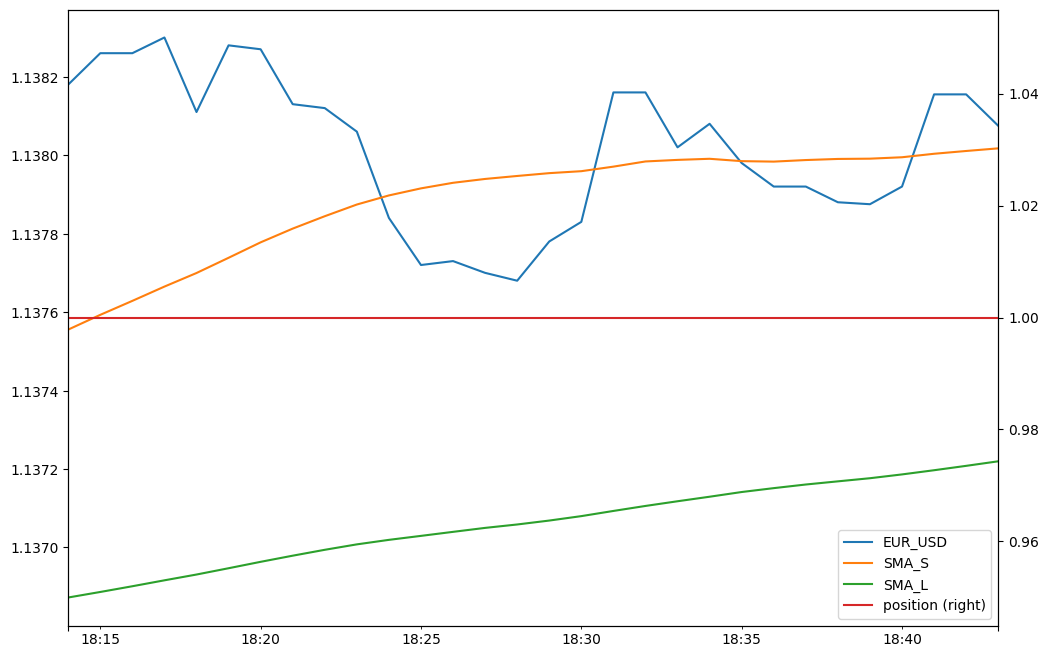

In [115]:
trader.data.tail(30).plot(figsize = (12, 8), secondary_y = "position")
plt.show()

__Strategy 2__: Bollinger Bands SMA 20 (minutes) / 1 Standard Deviation (200 ticks) 

## Stop here if you don´t want to see the solution!

###############################################################

In [116]:
class BollTrader(tpqoa.tpqoa):
    def __init__(self, conf_file, instrument, bar_length, SMA, dev, units):
        super().__init__(conf_file)
        self.instrument = instrument
        self.bar_length = pd.to_timedelta(bar_length)
        self.tick_data = pd.DataFrame()
        self.raw_data = None
        self.data = None 
        self.last_bar = None
        self.units = units
        self.position = 0
        self.profits = []
        
        #*****************add strategy-specific attributes here******************
        self.SMA = SMA
        self.dev = dev
        #************************************************************************
    
    def get_most_recent(self, days = 5):
        while True:
            time.sleep(2)
            now = datetime.now(timezone.utc).replace(tzinfo=None)
            now = now - timedelta(microseconds = now.microsecond)
            past = now - timedelta(days = days)
            df = self.get_history(instrument = self.instrument, start = past, end = now,
                                   granularity = "S5", price = "M", localize = False).c.dropna().to_frame()
            df.rename(columns = {"c":self.instrument}, inplace = True)
            df = df.resample(self.bar_length, label = "right").last().dropna().iloc[:-1]
            self.raw_data = df.copy()
            self.last_bar = self.raw_data.index[-1]
            if pd.to_datetime(datetime.now(timezone.utc)) - self.last_bar < self.bar_length:
                break
                
    def on_success(self, time, bid, ask):
        print(self.ticks, end = " ")
        
        recent_tick = pd.to_datetime(time)
        df = pd.DataFrame({self.instrument:(ask + bid)/2}, 
                          index = [recent_tick])
        self.tick_data = pd.concat([self.tick_data, df]) # new with pd.concat()
        
        if recent_tick - self.last_bar > self.bar_length:
            self.resample_and_join()
            self.define_strategy()
            self.execute_trades()
    
    def resample_and_join(self):
        self.raw_data = pd.concat([self.raw_data, self.tick_data.resample(self.bar_length, 
                                                                          label="right").last().ffill().iloc[:-1]])
        self.tick_data = self.tick_data.iloc[-1:]
        self.last_bar = self.raw_data.index[-1]
    
    def define_strategy(self): # "strategy-specific"
        df = self.raw_data.copy()
        
        #******************** define your strategy here ************************
        df["SMA"] = df[self.instrument].rolling(self.SMA).mean()
        df["Lower"] = df["SMA"] - df[self.instrument].rolling(self.SMA).std() * self.dev
        df["Upper"] = df["SMA"] + df[self.instrument].rolling(self.SMA).std() * self.dev
        df["distance"] = df[self.instrument] - df.SMA
        df["position"] = np.where(df[self.instrument] < df.Lower, 1, np.nan)
        df["position"] = np.where(df[self.instrument] > df.Upper, -1, df["position"])
        df["position"] = np.where(df.distance * df.distance.shift(1) < 0, 0, df["position"])
        df["position"] = df.position.ffill().fillna(0)
        #***********************************************************************
        
        self.data = df.copy()
    
    def execute_trades(self):
        if self.data["position"].iloc[-1] == 1:
            if self.position == 0:
                order = self.create_order(self.instrument, self.units, suppress = True, ret = True)
                self.report_trade(order, "GOING LONG")
            elif self.position == -1:
                order = self.create_order(self.instrument, self.units * 2, suppress = True, ret = True) 
                self.report_trade(order, "GOING LONG")
            self.position = 1
        elif self.data["position"].iloc[-1] == -1: 
            if self.position == 0:
                order = self.create_order(self.instrument, -self.units, suppress = True, ret = True)
                self.report_trade(order, "GOING SHORT")
            elif self.position == 1:
                order = self.create_order(self.instrument, -self.units * 2, suppress = True, ret = True)
                self.report_trade(order, "GOING SHORT")
            self.position = -1
        elif self.data["position"].iloc[-1] == 0: 
            if self.position == -1:
                order = self.create_order(self.instrument, self.units, suppress = True, ret = True) 
                self.report_trade(order, "GOING NEUTRAL")
            elif self.position == 1:
                order = self.create_order(self.instrument, -self.units, suppress = True, ret = True)
                self.report_trade(order, "GOING NEUTRAL")
            self.position = 0
    
    def report_trade(self, order, going):
        time = order["time"]
        units = order["units"]
        price = order["price"]
        pl = float(order["pl"])
        self.profits.append(pl)
        cumpl = sum(self.profits)
        print("\n" + 100* "-")
        print("{} | {}".format(time, going))
        print("{} | units = {} | price = {} | P&L = {} | Cum P&L = {}".format(time, units, price, pl, cumpl))
        print(100 * "-" + "\n")  
 

In [117]:
trader = BollTrader("oanda.cfg", "EUR_USD", "1min", SMA = 20, dev = 1, units = 100000)

In [118]:
trader.get_most_recent()
trader.stream_data(trader.instrument, stop = 200)
if trader.position != 0: # if we have a final open position
    close_order = trader.create_order(trader.instrument, units = -trader.position * trader.units, 
                                      suppress = True, ret = True) 
    trader.report_trade(close_order, "GOING NEUTRAL")
    trader.position = 0

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 
----------------------------------------------------------------------------------------------------
2025-05-29T18:49:14.337785324Z | GOING LONG
2025-05-29T18:49:14.337785324Z | units = 100000.0 | price = 1.13779 | P&L = 0.0 | Cum P&L = 0.0
----------------------------------------------------------------------------------------------------

130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 

In [119]:
trader.data

,EUR_USD,SMA,Lower,Upper,distance,position
2025-05-25 21:05:00+00:00,1.136720,NaN,NaN,NaN,NaN,0.0
2025-05-25 21:06:00+00:00,1.136630,NaN,NaN,NaN,NaN,0.0
2025-05-25 21:07:00+00:00,1.136620,NaN,NaN,NaN,NaN,0.0
2025-05-25 21:09:00+00:00,1.136600,NaN,NaN,NaN,NaN,0.0
2025-05-25 21:10:00+00:00,1.136540,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
2025-05-29 18:47:00+00:00,1.138025,1.137992,1.137850,1.138133,0.000033,0.0
2025-05-29 18:48:00+00:00,1.137860,1.138001,1.137875,1.138126,-0.000141,0.0
2025-05-29 18:49:00+00:00,1.137755,1.138000,1.137872,1.138127,-0.000244,1.0
2025-05-29 18:50:00+00:00,1.137765,1.137996,1.137863,1.138129,-0.000231,1.0


In [120]:
import matplotlib.pyplot as plt

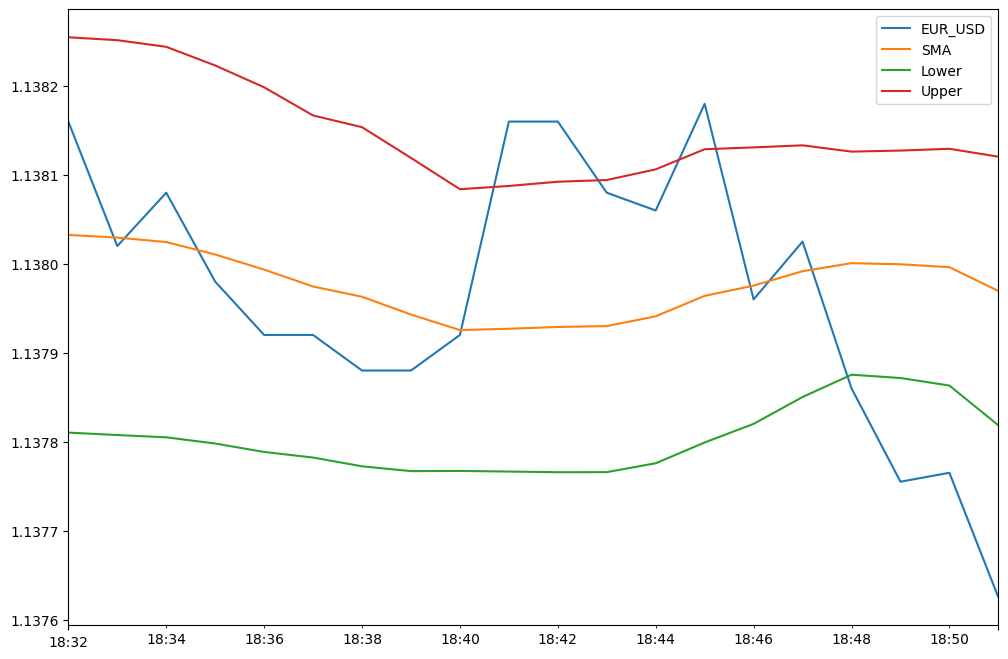

In [121]:
trader.data.tail(20)[["EUR_USD", "SMA", "Lower", "Upper"]].plot(figsize = (12, 8))
plt.show()

## Machine Learning Strategies (1) - Model Fitting

In [122]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier # added (from sklearn v. 1.7)

In [123]:
data = pd.read_csv("five_minute.csv", parse_dates = ["time"], index_col = "time")

In [124]:
data

,price
time,
2019-01-01 22:00:00+00:00,1.146580
2019-01-01 22:05:00+00:00,1.146350
2019-01-01 22:10:00+00:00,1.146320
2019-01-01 22:15:00+00:00,1.146320
2019-01-01 22:20:00+00:00,1.146530
...,...
2019-12-30 23:35:00+00:00,1.120180
2019-12-30 23:40:00+00:00,1.120210
2019-12-30 23:45:00+00:00,1.120295


In [125]:
data["returns"] = np.log(data.div(data.shift(1)))

In [126]:
data.dropna(inplace = True)

In [127]:
data["direction"] = np.sign(data.returns)

In [128]:
data

,price,returns,direction
time,,,
2019-01-01 22:05:00+00:00,1.146350,-0.000201,-1.0
2019-01-01 22:10:00+00:00,1.146320,-0.000026,-1.0
2019-01-01 22:15:00+00:00,1.146320,0.000000,0.0
2019-01-01 22:20:00+00:00,1.146530,0.000183,1.0
2019-01-01 22:25:00+00:00,1.146475,-0.000048,-1.0
...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-1.0
2019-12-30 23:40:00+00:00,1.120210,0.000027,1.0
2019-12-30 23:45:00+00:00,1.120295,0.000076,1.0


In [129]:
lags = 2

In [130]:
cols = []
for lag in range(1, lags + 1):
    col = "lag{}".format(lag)
    data[col] = data.returns.shift(lag)
    cols.append(col)
data.dropna(inplace = True)

++++++++++++++++++++++++++++

__Scaling/Standardizing Features (new)__

In [131]:
means = data[cols].mean()
means

lag1   -3.121233e-07
lag2   -3.146025e-07
dtype: float64

In [132]:
stand_devs = data[cols].std()
stand_devs

lag1    0.000199
lag2    0.000199
dtype: float64

In [133]:
data[cols] = (data[cols]-means) / stand_devs
data

,price,returns,direction,lag1,lag2
time,,,,,
2019-01-01 22:15:00+00:00,1.146320,0.000000,0.0,-0.130239,-1.008842
2019-01-01 22:20:00+00:00,1.146530,0.000183,1.0,0.001572,-0.130225
2019-01-01 22:25:00+00:00,1.146475,-0.000048,-1.0,0.924174,0.001585
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-1.0,-0.240045,0.924180
2019-01-01 22:35:00+00:00,1.146455,0.000000,0.0,-0.086292,-0.240031
...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-1.0,-0.560428,-0.088329
2019-12-30 23:40:00+00:00,1.120210,0.000027,1.0,-0.020909,-0.560412
2019-12-30 23:45:00+00:00,1.120295,0.000076,1.0,0.136458,-0.020897


+++++++++++++++++++++++++++

In [ ]:
# lm = LogisticRegression(C = 1e6, max_iter = 100000, multi_class = "ovr") # old

In [134]:
lm = OneVsRestClassifier(LogisticRegression(C = 1e6, max_iter = 100000)) # new (from sklearn v. 1.7)

In [135]:
lm.fit(data[cols], data.direction)

OneVsRestClassifier(estimator=LogisticRegression(C=1000000.0, max_iter=100000))

In [136]:
lm

OneVsRestClassifier(estimator=LogisticRegression(C=1000000.0, max_iter=100000))

__In-Sample "Prediction"__

In [137]:
data["pred"] = lm.predict(data[cols])

In [138]:
data

,price,returns,direction,lag1,lag2,pred
time,,,,,,
2019-01-01 22:15:00+00:00,1.146320,0.000000,0.0,-0.130239,-1.008842,1.0
2019-01-01 22:20:00+00:00,1.146530,0.000183,1.0,0.001572,-0.130225,1.0
2019-01-01 22:25:00+00:00,1.146475,-0.000048,-1.0,0.924174,0.001585,-1.0
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-1.0,-0.240045,0.924180,1.0
2019-01-01 22:35:00+00:00,1.146455,0.000000,0.0,-0.086292,-0.240031,1.0
...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-1.0,-0.560428,-0.088329,1.0
2019-12-30 23:40:00+00:00,1.120210,0.000027,1.0,-0.020909,-0.560412,1.0
2019-12-30 23:45:00+00:00,1.120295,0.000076,1.0,0.136458,-0.020897,-1.0


In [139]:
hits = np.sign(data.direction * data.pred).value_counts()

In [140]:
hits

 1.0    37472
-1.0    34286
 0.0     1959
Name: count, dtype: int64

In [141]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio

0.5083223679748227

In [142]:
lm

OneVsRestClassifier(estimator=LogisticRegression(C=1000000.0, max_iter=100000))

__Saving the model__

In [143]:
import pickle

In [144]:
pickle.dump(lm, open("logreg.pkl", "wb"))

__Saving the parameters (mean, std)__ NEW

In [145]:
params = {"mu":means, "std":stand_devs}
params

{'mu': lag1   -3.121233e-07
 lag2   -3.146025e-07
 dtype: float64,
 'std': lag1    0.000199
 lag2    0.000199
 dtype: float64}

In [146]:
pickle.dump(params, open("params.pkl", "wb"))

## Machine Learning Strategies (2) - Implementation

In [147]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier 
import tpqoa
from datetime import datetime, timezone, timedelta
import time
import pickle
import warnings
warnings.filterwarnings('ignore')

In [148]:
class MLTrader(tpqoa.tpqoa):
    def __init__(self, conf_file, instrument, bar_length, lags, model, units):
        super().__init__(conf_file)
        self.instrument = instrument
        self.bar_length = pd.to_timedelta(bar_length)
        self.tick_data = pd.DataFrame()
        self.raw_data = None
        self.data = None 
        self.last_bar = None
        self.units = units
        self.position = 0
        self.profits = []
        
        #*****************add strategy-specific attributes here******************
        self.lags = lags
        self.model = model
        #************************************************************************
    
    def get_most_recent(self, days = 5):
        while True:
            time.sleep(2)
            now = datetime.now(timezone.utc).replace(tzinfo=None)
            now = now - timedelta(microseconds = now.microsecond)
            past = now - timedelta(days = days)
            df = self.get_history(instrument = self.instrument, start = past, end = now,
                                   granularity = "S5", price = "M", localize = False).c.dropna().to_frame()
            df.rename(columns = {"c":self.instrument}, inplace = True)
            df = df.resample(self.bar_length, label = "right").last().dropna().iloc[:-1]
            self.raw_data = df.copy()
            self.last_bar = self.raw_data.index[-1]
            if pd.to_datetime(datetime.now(timezone.utc)) - self.last_bar < self.bar_length:
                break
                
    def on_success(self, time, bid, ask):
        print(self.ticks, end = " ")
        
        recent_tick = pd.to_datetime(time)
        df = pd.DataFrame({self.instrument:(ask + bid)/2}, 
                          index = [recent_tick])
        self.tick_data = pd.concat([self.tick_data, df]) # new with pd.concat()
        
        if recent_tick - self.last_bar > self.bar_length:
            self.resample_and_join()
            self.define_strategy()
            self.execute_trades()
    
    def resample_and_join(self):
        self.raw_data = pd.concat([self.raw_data, self.tick_data.resample(self.bar_length, 
                                                                          label="right").last().ffill().iloc[:-1]])
        self.tick_data = self.tick_data.iloc[-1:]
        self.last_bar = self.raw_data.index[-1]
    
    def define_strategy(self): # "strategy-specific"
        df = self.raw_data.copy()
        
        #******************** define your strategy here ************************
        df = pd.concat([df, self.tick_data]) # new with pd.concat
        df["returns"] = np.log(df[self.instrument] / df[self.instrument].shift())
        cols = []
        for lag in range(1, self.lags + 1):
            col = "lag{}".format(lag)
            df[col] = df.returns.shift(lag)
            cols.append(col)
        df.dropna(inplace = True)
        
        df[cols] = (df[cols] - means) / stand_devs # newly added (scaling)
                
        df["position"] = lm.predict(df[cols])
        #***********************************************************************
        
        self.data = df.copy()
    
    def execute_trades(self):
        if self.data["position"].iloc[-1] == 1:
            if self.position == 0:
                order = self.create_order(self.instrument, self.units, suppress = True, ret = True)
                self.report_trade(order, "GOING LONG")
            elif self.position == -1:
                order = self.create_order(self.instrument, self.units * 2, suppress = True, ret = True) 
                self.report_trade(order, "GOING LONG")
            self.position = 1
        elif self.data["position"].iloc[-1] == -1: 
            if self.position == 0:
                order = self.create_order(self.instrument, -self.units, suppress = True, ret = True)
                self.report_trade(order, "GOING SHORT")
            elif self.position == 1:
                order = self.create_order(self.instrument, -self.units * 2, suppress = True, ret = True)
                self.report_trade(order, "GOING SHORT")
            self.position = -1
        elif self.data["position"].iloc[-1] == 0: 
            if self.position == -1:
                order = self.create_order(self.instrument, self.units, suppress = True, ret = True) 
                self.report_trade(order, "GOING NEUTRAL")
            elif self.position == 1:
                order = self.create_order(self.instrument, -self.units, suppress = True, ret = True)
                self.report_trade(order, "GOING NEUTRAL")
            self.position = 0
    
    def report_trade(self, order, going):
        time = order["time"]
        units = order["units"]
        price = order["price"]
        pl = float(order["pl"])
        self.profits.append(pl)
        cumpl = sum(self.profits)
        print("\n" + 100* "-")
        print("{} | {}".format(time, going))
        print("{} | units = {} | price = {} | P&L = {} | Cum P&L = {}".format(time, units, price, pl, cumpl))
        print(100 * "-" + "\n")  

In [149]:
lm = pickle.load(open("logreg.pkl", "rb"))
lm

OneVsRestClassifier(estimator=LogisticRegression(C=1000000.0, max_iter=100000))

+++++++++++++++++++++++++++++++++++++++

__Loading the parameters (mean, std)__ NEW

In [150]:
params = pickle.load(open("params.pkl", "rb"))
params

{'mu': lag1   -3.121233e-07
 lag2   -3.146025e-07
 dtype: float64,
 'std': lag1    0.000199
 lag2    0.000199
 dtype: float64}

In [151]:
means = params["mu"]
stand_devs = params["std"]

In [152]:
means

lag1   -3.121233e-07
lag2   -3.146025e-07
dtype: float64

+++++++++++++++++++++++++++++++++++++++

In [153]:
trader = MLTrader("oanda.cfg", "EUR_USD", "5min", lags = 2, model = lm, units = 100000)

In [154]:
trader.model

OneVsRestClassifier(estimator=LogisticRegression(C=1000000.0, max_iter=100000))

In [155]:
trader.get_most_recent()
trader.stream_data(trader.instrument, stop = 10000)
if trader.position != 0: # if we have a final open position
    close_order = trader.create_order(trader.instrument, units = -trader.position * trader.units, 
                                      suppress = True, ret = True) 
    trader.report_trade(close_order, "GOING NEUTRAL")
    trader.position = 0

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 
----------------------------------------------------------------------------------------------------
2025-05-29T19:10:00.958283263Z | GOING SHORT
2025-05-29T19:10:00.958283263Z | units = -100000.0 | price = 1.13758 | P&L = 0.0 | Cum P&L = 0.0
----------------------------------------------------------------------------------------------------

114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 19

KeyboardInterrupt: 

In [156]:
trader.data.tail(10)

,EUR_USD,returns,lag1,lag2,position
2025-05-29 19:05:00+00:00,1.137560,0.000035,0.045850,-1.105230,1.0
2025-05-29 19:10:00+00:00,1.137620,0.000053,0.178678,0.045862,-1.0
2025-05-29 19:15:00+00:00,1.137525,-0.000084,0.267220,0.178690,-1.0
2025-05-29 19:20:00+00:00,1.136965,-0.000492,-0.419043,0.267230,1.0
2025-05-29 19:25:00+00:00,1.137350,0.000339,-2.478559,-0.419028,1.0
2025-05-29 19:30:00+00:00,1.137365,0.000013,1.706793,-2.478530,-1.0
2025-05-29 19:35:00+00:00,1.137260,-0.000092,0.067998,1.706794,-1.0
2025-05-29 19:40:00+00:00,1.137115,-0.000128,-0.463425,0.068010,1.0
2025-05-29 19:45:00+00:00,1.136875,-0.000211,-0.640637,-0.463409,1.0
2025-05-29 19:45:02.605390413+00:00,1.136870,-0.000004,-1.061575,-0.640620,1.0


In [157]:
trader.tick_data

,EUR_USD
2025-05-29 19:45:02.605390413+00:00,1.136870
2025-05-29 19:45:02.869762731+00:00,1.136845
2025-05-29 19:45:03.610826629+00:00,1.136820
2025-05-29 19:45:04.316416792+00:00,1.136815
2025-05-29 19:45:05.662763815+00:00,1.136785
...,...
2025-05-29 19:49:14.746692266+00:00,1.136780
2025-05-29 19:49:16.523686637+00:00,1.136785
2025-05-29 19:49:18.360366124+00:00,1.136800
2025-05-29 19:49:19.233244848+00:00,1.136775


## Importing a Trader Module / Class

In [158]:
import trader as tr

In [159]:
trader = tr.ConTrader("oanda.cfg", "EUR_USD", "1min", window = 1, units = 100000)
trader.get_most_recent()
trader.stream_data(trader.instrument, stop = 100)
if trader.position != 0: # if we have a final open position
    close_order = trader.create_order(trader.instrument, units = -trader.position * trader.units, 
                                      suppress = True, ret = True) 
    trader.report_trade(close_order, "GOING NEUTRAL")
    trader.position = 0

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
----------------------------------------------------------------------------------------------------
2025-05-29T19:54:01.805743690Z | GOING SHORT
2025-05-29T19:54:01.805743690Z | units = -100000.0 | price = 1.1367 | P&L = -45.4217 | Cum P&L = -45.4217
----------------------------------------------------------------------------------------------------

27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 
----------------------------------------------------------------------------------------------------
2025-05-29T19:55:28.824663237Z | GOING NEUTRAL
2025-05-29T19:55:28.824663237Z | units = 100000.0 | price = 1.13678 | P&L = 0.0 | Cum P&L = -45.4217
----------------------------------------------------------------------------------------------------



In [160]:
trader.data.tail(10)

,EUR_USD,returns,position
2025-05-29 19:46:00+00:00,1.136800,-0.000070,1.0
2025-05-29 19:47:00+00:00,1.136680,-0.000106,1.0
2025-05-29 19:48:00+00:00,1.136770,0.000079,-1.0
2025-05-29 19:49:00+00:00,1.136780,0.000009,-1.0
2025-05-29 19:50:00+00:00,1.136720,-0.000053,1.0
2025-05-29 19:51:00+00:00,1.136790,0.000062,-1.0
2025-05-29 19:52:00+00:00,1.136680,-0.000097,1.0
2025-05-29 19:53:00+00:00,1.136680,0.000000,-0.0
2025-05-29 19:54:00+00:00,1.136745,0.000057,-1.0
2025-05-29 19:55:00+00:00,1.136750,0.000004,-1.0


####################################################################################################

## How to Time/Schedule the End of a Trading Session (Simple Contrarian)

(you can find the corresponding Video for the following lines of code in __Section 26__: Cloud Deployment (AWS) | Scheduling Trading Sessions | Full Automation)

In [ ]:
import pandas as pd
import numpy as np
import tpqoa
from datetime import datetime, timezone, timedelta
import time
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# datetime.utcnow().time() # current utc time (old)

In [ ]:
datetime.now(timezone.utc).time() # new (Python 3.12)

In [ ]:
pd.to_datetime("17:30").time() # desired end of trading session (in utc time)

In [ ]:
if datetime.now(timezone.utc).time() >= pd.to_datetime("17:30").time():
    print("Stop the Trading Session!")

In [ ]:
class ConTrader(tpqoa.tpqoa):
    def __init__(self, conf_file, instrument, bar_length, window, units):
        super().__init__(conf_file)
        self.instrument = instrument
        self.bar_length = pd.to_timedelta(bar_length)
        self.tick_data = pd.DataFrame()
        self.raw_data = None
        self.data = None 
        self.last_bar = None
        self.units = units
        self.position = 0
        self.profits = []
        
        #*****************add strategy-specific attributes here******************
        self.window = window
        #************************************************************************
    
    def get_most_recent(self, days = 5):
        while True:
            time.sleep(2)
            now = datetime.now(timezone.utc).replace(tzinfo=None)
            now = now - timedelta(microseconds = now.microsecond)
            past = now - timedelta(days = days)
            df = self.get_history(instrument = self.instrument, start = past, end = now,
                                   granularity = "S5", price = "M", localize = False).c.dropna().to_frame()
            df.rename(columns = {"c":self.instrument}, inplace = True)
            df = df.resample(self.bar_length, label = "right").last().dropna().iloc[:-1]
            self.raw_data = df.copy()
            self.last_bar = self.raw_data.index[-1]
            if pd.to_datetime(datetime.now(timezone.utc)) - self.last_bar < self.bar_length:
                break
                
    def on_success(self, time, bid, ask):
        
        print(self.ticks, end = " ")
        
        recent_tick = pd.to_datetime(time)
        
        # define stop
        if recent_tick.time() >= pd.to_datetime("13:00").time():
            self.stop_stream = True
        
        df = pd.DataFrame({self.instrument:(ask + bid)/2}, 
                          index = [recent_tick])
        self.tick_data = pd.concat([self.tick_data, df]) # new with pd.concat()
        
        if recent_tick - self.last_bar > self.bar_length:
            self.resample_and_join()
            self.define_strategy()
            self.execute_trades()
    
    def resample_and_join(self):
        self.raw_data = pd.concat([self.raw_data, self.tick_data.resample(self.bar_length, 
                                                                          label="right").last().ffill().iloc[:-1]])
        self.tick_data = self.tick_data.iloc[-1:]
        self.last_bar = self.raw_data.index[-1]
    
    def define_strategy(self): # "strategy-specific"
        df = self.raw_data.copy()
        
        #******************** define your strategy here ************************
        df["returns"] = np.log(df[self.instrument] / df[self.instrument].shift())
        df["position"] = -np.sign(df.returns.rolling(self.window).mean())
        #***********************************************************************
        
        self.data = df.copy()
    
    def execute_trades(self):
        if self.data["position"].iloc[-1] == 1:
            if self.position == 0:
                order = self.create_order(self.instrument, self.units, suppress = True, ret = True)
                self.report_trade(order, "GOING LONG")
            elif self.position == -1:
                order = self.create_order(self.instrument, self.units * 2, suppress = True, ret = True) 
                self.report_trade(order, "GOING LONG")
            self.position = 1
        elif self.data["position"].iloc[-1] == -1: 
            if self.position == 0:
                order = self.create_order(self.instrument, -self.units, suppress = True, ret = True)
                self.report_trade(order, "GOING SHORT")
            elif self.position == 1:
                order = self.create_order(self.instrument, -self.units * 2, suppress = True, ret = True)
                self.report_trade(order, "GOING SHORT")
            self.position = -1
        elif self.data["position"].iloc[-1] == 0:
            if self.position == -1:
                order = self.create_order(self.instrument, self.units, suppress = True, ret = True) 
                self.report_trade(order, "GOING NEUTRAL")
            elif self.position == 1:
                order = self.create_order(self.instrument, -self.units, suppress = True, ret = True) 
                self.report_trade(order, "GOING NEUTRAL")
            self.position = 0
    
    def report_trade(self, order, going):
        time = order["time"]
        units = order["units"]
        price = order["price"]
        pl = float(order["pl"])
        self.profits.append(pl)
        cumpl = sum(self.profits)
        print("\n" + 100* "-")
        print("{} | {}".format(time, going))
        print("{} | units = {} | price = {} | P&L = {} | Cum P&L = {}".format(time, units, price, pl, cumpl))
        print(100 * "-" + "\n")  
    

In [ ]:
trader = ConTrader("oanda.cfg", "EUR_USD", "1min", window = 1, units = 100000)

In [ ]:
trader.get_most_recent()
trader.stream_data(trader.instrument) # no stop after n ticks!
if trader.position != 0: # if we have a final open position
    close_order = trader.create_order(trader.instrument, units = -trader.position * trader.units, 
                                      suppress = True, ret = True) 
    trader.report_trade(close_order, "GOING NEUTRAL")
    trader.position = 0